# WELCOME!

Welcome to "***Tree Types Prediction Project***".

In this project, you must perform EDA processes for implementing predictive models. Handling outliers, domain knowledge and feature engineering (using ***sqlite3*** library) will be challenges. 

Also, this project aims to improve your ability to implement algorithms for ***Multi-Class Classification***. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind classification models and scikit-learn module as well as Machine Learning before you begin.*

---
---

# #Determines

Dataset contains tree observations from four areas of one national forest district. This dataset includes information on tree type, shadow coverage, distance to nearby landmarks, soil type, and local topography. The goal of the project is to build a model that predicts what types of trees grow in an area.
***The Forest Dataset*** contains approximately 600 thousand lines, also you can easily find many information about it on the web (especially Kaggle).

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (forest, trees) knowledge on the internet to get to know the data set in the fastest way. 

You should implement cleaning, handling with outliers and missing values using Pandas, NumPy and other required modules for the best result in modeling. You should do Feature Engineering using SQLite local database. 

At this point, in order to improve your skills of using SQL with Python, you are asked to perform feature engineering operations using *sqlite3* library in Python.

After that, your final dataset with the new variables you have created will be ready for model building. You will implement ***Support Vector Machine, XGBoost, Random Forest, Desicion Tree*** and ***K-Nearest Neighbors (KNN)*** algorithms. Also, evaluate the success of your models with appropriate performance metrics and visualize them using ***Yellowbrick, Seaborn*** or ***Matplotlib*** modules.

At the end of the project, create a chart comparing the performance of all models and choose the most successful model.

- ***NOTE:*** *Evaluate your models knowing that this is [imbalanced data](https://towardsdatascience.com/having-an-imbalanced-dataset-here-is-how-you-can-solve-it-1640568947eb). This is not the primary goal of the project, but you can study solve the class [imbalance problem](https://towardsdatascience.com/handling-imbalanced-datasets-in-machine-learning-7a0e84220f28) if you want.*



---
---

# #Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Load Dataset*
    
    *iii. Explore Data*

#### 2.  Data Cleaning
- Detect Missing Values and Outliers 

    *i. Missing Value Detection*
    
    *ii. Outlier Detection*
    
- Deal with Outliers
    
    *i. Visualize Zscore Tresholds (how many times IQR) by Continuous Variables*
    
    *ii. Drop Outliers*


#### 3. Feature Engineering with sqlite3 Module


#### 4. Prediction (Multi-class Classification)
- Import libraries
- Data Preprocessing
- Implement KNN Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Implement SVM Classifer
- Compare The Models



---
---

## 1. Exploratory Data Analysis

### Import Libraries, Load Dataset, Exploring Data

#### *i. Import Libraries*

Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [5]:
import pandas as pd      
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_absolute_error,mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.decomposition import PCA
from sqlalchemy import create_engine
from IPython.core.pylabtools import figsize
from scipy.stats import zscore
from scipy import stats
from numpy import percentile
import warnings
warnings.filterwarnings('ignore')

font_title = {'family': 'times new roman', 
              'color': 'darkred', 
              'weight': 'bold', 
              'size': 14}

sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 100

#### *ii. Load Dataset*

In [6]:
tree=pd.read_csv("covtype.csv")
tree.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


   **Features**
   
    Elevation - Elevation in meters
    Aspect - Aspect in degrees azimuth
    Slope - Slope in degrees
    Horizontal_Distance_To_Hydrology - Horz Dist to nearest surface water features
    Vertical_Distance_To_Hydrology - Vert Dist to nearest surface water features
    Horizontal_Distance_To_Roadways - Horz Dist to nearest roadway
    Hillshade_9am (0 to 255 index) - Hillshade index at 9am, summer solstice
    Hillshade_Noon (0 to 255 index) - Hillshade index at noon, summer solstice
    Hillshade_3pm (0 to 255 index) - Hillshade index at 3pm, summer solstice
    Horizontal_Distance_To_Fire_Points - Horz Dist to nearest wildfire ignition points
    Wilderness_Area (4 binary columns, 0 = absence or 1 = presence) - Wilderness area designation
    Soil_Type (40 binary columns, 0 = absence or 1 = presence) - Soil Type designation
    Cover_Type (7 types, integers 1 to 7) - Forest Cover Type designation

### `Wilderness_Area`
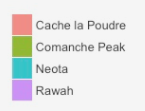

### `Cover_Type`
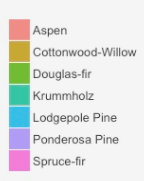

In [7]:
tree.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

#### *iii. Explore Data*
- Focus on numerical and categorical data
- Detect Number of Unique values of each column
- Focus on Target Variable (Cover_Type)
 - Detect relationships and correlations between independent variables and target variable.
 - It may be nice to visualize the class frequencies of the target variable.
- Detect relationships and correlations between independent variables. (You can prefer to keep only one of the highly correlated continuous variables.)
- Consider dropping features that contain little data or that you think will not contribute to the model.

In [8]:
def reversed_dummies(df: pd.DataFrame, dummy_cols: list, new_header: str, prefix='_') ->'DataFrame':
    serial=df[dummy_cols].idxmax(axis=1).str.split(prefix).str[-1]
    return pd.concat([df.drop(dummy_cols,axis=1),pd.DataFrame(serial,columns=[new_header])],axis=1)

In [9]:
tree.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

In [10]:
dummy_cols=['Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40']
df=reversed_dummies(tree,dummy_cols,'Soil')
dummy_cols=['Wilderness_Area1','Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4']
df=reversed_dummies(df,dummy_cols,'Wilderness')
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type,Soil,Wilderness
0,2596,51,3,258,0,510,221,232,148,6279,5,Type29,Area1
1,2590,56,2,212,-6,390,220,235,151,6225,5,Type29,Area1
2,2804,139,9,268,65,3180,234,238,135,6121,2,Type12,Area1
3,2785,155,18,242,118,3090,238,238,122,6211,2,Type30,Area1
4,2595,45,2,153,-1,391,220,234,150,6172,5,Type29,Area1


In [11]:
df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,7.000000


In [12]:
# categorik verilerin istatistiksel analizi icin:
df.describe(include=['O'])

,Soil,Wilderness
count,581012,581012
unique,40,4
top,Type29,Area1
freq,115247,260796


In [13]:
# her columns in num of uniques

df.apply(lambda x: x.nunique())

Elevation                             1978
Aspect                                 361
Slope                                   67
Horizontal_Distance_To_Hydrology       551
Vertical_Distance_To_Hydrology         700
Horizontal_Distance_To_Roadways       5785
Hillshade_9am                          207
Hillshade_Noon                         185
Hillshade_3pm                          255
Horizontal_Distance_To_Fire_Points    5827
Cover_Type                               7
Soil                                    40
Wilderness                               4
dtype: int64

In [14]:
# Null percentages of each features

df.isnull().sum()*100/tree.shape[0]

Elevation                             0.0
Aspect                                0.0
Slope                                 0.0
Horizontal_Distance_To_Hydrology      0.0
Vertical_Distance_To_Hydrology        0.0
Horizontal_Distance_To_Roadways       0.0
Hillshade_9am                         0.0
Hillshade_Noon                        0.0
Hillshade_3pm                         0.0
Horizontal_Distance_To_Fire_Points    0.0
Cover_Type                            0.0
Soil                                  0.0
Wilderness                            0.0
dtype: float64

In [15]:
# Target Label

df.Cover_Type.unique() 

array([5, 2, 1, 7, 3, 6, 4], dtype=int64)

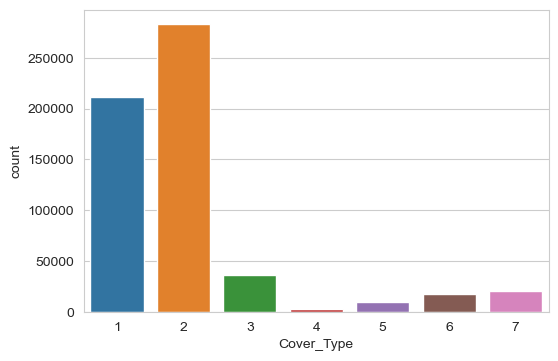

In [16]:
# df.Cover_Type.value_counts(dropna=False).sort_index()
sns.countplot(x='Cover_Type',data=df);

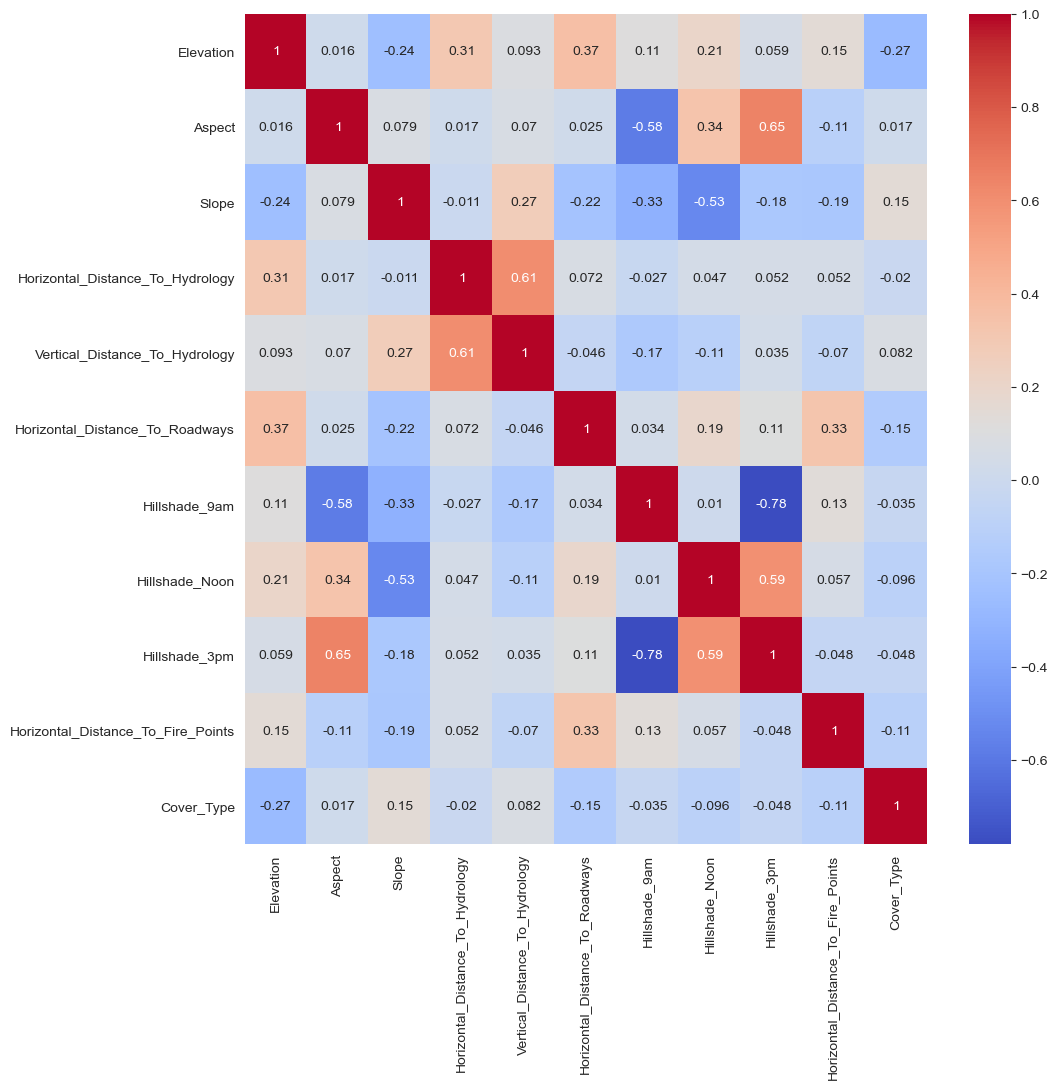

In [17]:
plt.figure(figsize=(11,11))
sns.heatmap(df.corr(),annot=True, cmap="coolwarm");

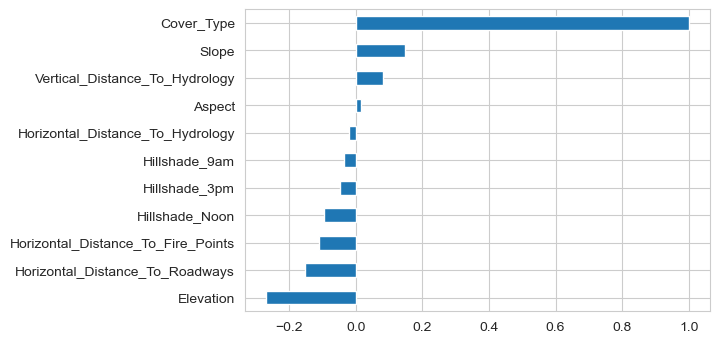

In [18]:
df.corr()["Cover_Type"].sort_values().plot.barh();

In [19]:
print('Unique Values of Each Features:\n')
for i in df:
    print(f'{i}:\n{sorted(df[i].unique())}\n')

Unique Values of Each Features:

Elevation:
[1859, 1860, 1861, 1863, 1866, 1867, 1868, 1871, 1872, 1873, 1874, 1876, 1877, 1879, 1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892, 1893, 1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2

**Summary Results :**
* "Elevation", "Slope", "Horizontal_Distance_To_Hydrology", "Vertical_Distance_To_Hydrology","Horizontal_Distance_To_Roadways", "Horizontal_Distance_To_Fire_Points" are continuous variables and their values vary.
* "Aspect" is also continuous and its values vary from 0 to 360. It has angular values.
* "Hillshade_3pm", "Hillshade_Noon", "Hillshade_3pm" are also continuos and their values vary from 0 to 255. This means that the values represent bitwise value. I concluded that the values are RGB color representation of the shadow at a particular time.
* Wilderness_Areas and Soil_Types are categorical (binary 1 or 0) data.

### Relationships and Correlations Between Features

* Wilderness - Soil
* Horizontal_Distance_To_Hydrology - Vertical_Distance_To_Hydrology
* Soil - Cover_Type
* Wilderness - Cover_Type
* Elevation - Cover_Type
* Slope - Cover_Type
* Horizontal_Distance_To_Roadways - Cover_Type
* Horizontal_Distance_To_Fire_Points - Cover_Type

In [20]:
# sns.pairplot(df);

> **Wilderness - Soil**

In [21]:
df.groupby(['Wilderness']).Soil.describe(include=['O'])

,count,unique,top,freq
Wilderness,,,,
Area1,260796,18,Type29,115173
Area2,29884,17,Type23,8153
Area3,253364,28,Type32,48758
Area4,36968,12,Type10,17914


> **Horizontal_Distance_To_Hydrology - Vertical_Distance_To_Hydrology**

In [22]:
plt.figure(figsize=(25,25))
sns.scatterplot(x='Horizontal_Distance_To_Hydrology',y='Vertical_Distance_To_Hydrology',data=df, hue='Wilderness');

Error in callback <function flush_figures at 0x0000018B214F0CA0> (for post_execute):


KeyboardInterrupt: 

> **Soil - Cover_Type**

In [23]:
df.Soil.value_counts(dropna=False)

Type29    115247
Type23     57752
Type32     52519
Type33     45154
Type22     33373
Type10     32634
Type30     30170
Type12     29971
Type31     25666
Type24     21278
Type13     17431
Type38     15573
Type39     13806
Type11     12410
Type4      12396
Type20      9259
Type40      8750
Type2       7525
Type6       6575
Type3       4823
Type19      4021
Type17      3422
Type1       3031
Type16      2845
Type26      2589
Type18      1899
Type35      1891
Type34      1611
Type5       1597
Type9       1147
Type27      1086
Type28       946
Type21       838
Type14       599
Type25       474
Type37       298
Type8        179
Type36       119
Type7        105
Type15         3
Name: Soil, dtype: int64

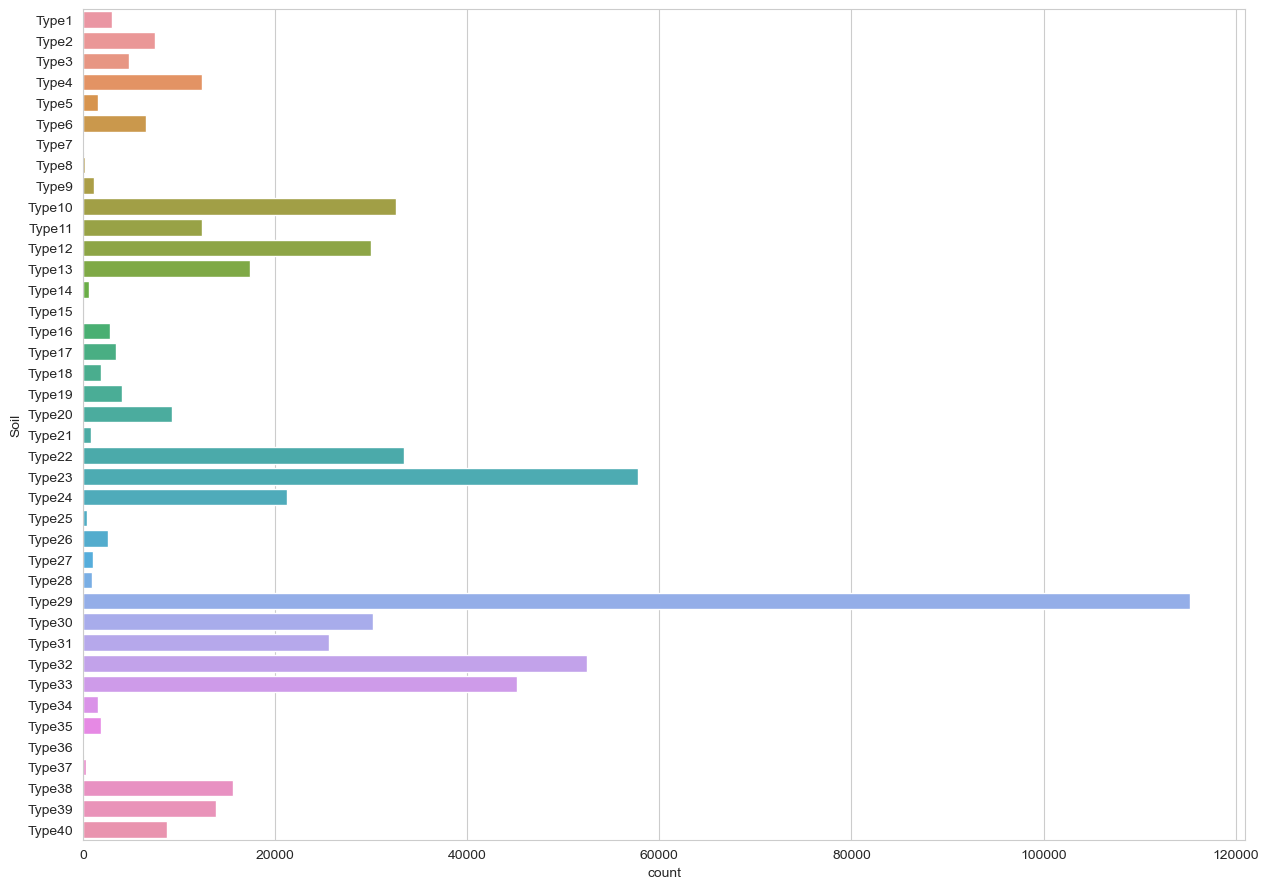

In [24]:
plt.figure(figsize=(15,11))
sns.countplot(y='Soil',data=df.sort_values(by=['Soil'], key=lambda col: col.str.extract('(\d+)')[0].astype('float')));

> **Wilderness - Cover_Type**

In [25]:
df.Wilderness.value_counts(dropna=False)

Area1    260796
Area3    253364
Area4     36968
Area2     29884
Name: Wilderness, dtype: int64

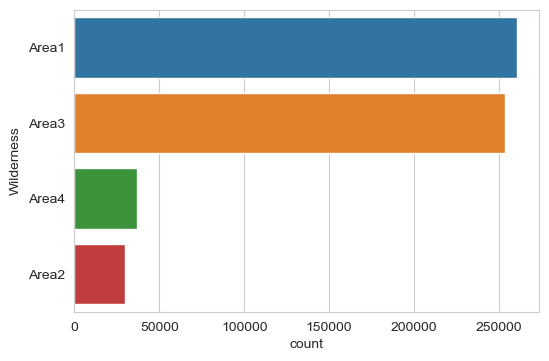

In [26]:
# plt.figure(figsize=(20,10))
sns.countplot(y='Wilderness',data=df);

In [27]:
df.groupby(['Cover_Type', 'Wilderness']).Elevation.describe()

count         mean         std     min     25%  \
Cover_Type Wilderness                                                      
1          Area1       105717.0  3122.768514  155.022405  2518.0  3025.0   
           Area2        18595.0  3236.455284   99.533587  2945.0  3168.0   
           Area3        87528.0  3112.838497  162.417686  2466.0  3017.0   
2          Area1       146197.0  2906.875702  171.388725  2473.0  2783.0   
           Area2         8985.0  3214.070562   93.283480  2957.0  3145.0   
           Area3       125093.0  2927.173191  179.859908  2313.0  2806.0   
           Area4         3026.0  2472.009253   94.994214  2142.0  2441.0   
3          Area3        14300.0  2574.476503  104.619631  2270.0  2505.0   
           Area4        21454.0  2274.554442  145.699034  1859.0  2166.0   
4          Area4         2747.0  2223.939934  102.524587  1988.0  2142.0   
5          Area1         3781.0  2767.827823   95.802905  2482.0  2721.0   
           Area3         5712.0  2800.384804   94.923879  2526.0  2746.0   
6          Area3         7626.0  2569.259638  114.722038  2325.0  2488.0   
           Area4         9741.0  2301.689560  147.597353  1863.0  2216.0   
7          Area1         5101.0  3310.394825   81.642063  3107.0  3251.0   
           Area2         2304.0  3444.019097   77.546062  3265.0  3395.0   
           Area3        13105.0  3367.555361  109.494807  2868.0  3314.0   

                          50%      75%     max  
Cover_Type Wilderness                           
1          Area1       3133.0  3226.00  3686.0  
           Area2       3229.0  3309.00  3489.0  
           Area3       3132.0  3228.00  3470.0  
2          Area1       2926.0  3017.00  3333.0  
           Area2       3229.0  3283.00  3433.0  
           Area3       2939.0  3050.00  3425.0  
           Area4       2501.0  2533.00  2654.0  
3          Area3       2575.0  2639.25  2899.0  
           Area4       2296.0  2384.00  2644.0  
4          Area4       2231.0  2304.00  2526.0  
5          Area1       2765.0  2819.00  2981.0  
           Area3       2818.0  2870.00  3011.0  
6          Area3       2565.0  2648.00  2900.0  
           Area4       2337.0  2416.00  2563.0  
7          Area1       3306.0  3371.00  3619.0  
           Area2       3430.0  3497.25  3647.0  
           Area3       3366.0  3406.00  3858.0

> **Elevation - Cover_Type**

In [28]:
df[["Elevation", "Cover_Type"]].groupby(["Cover_Type"], as_index = False).mean()

,Cover_Type,Elevation
0,1,3128.644888
1,2,2920.936061
2,3,2394.509845
3,4,2223.939934
4,5,2787.417571
5,6,2419.181897
6,7,3361.928669


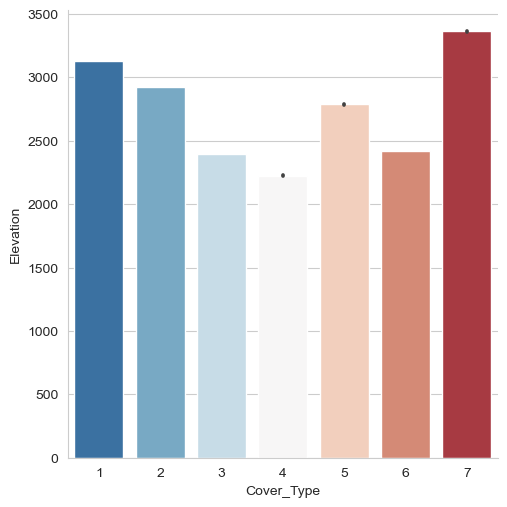

In [29]:
sns.factorplot(x="Cover_Type", y ="Elevation", data=df, kind="bar", palette='RdBu_r',size=5);

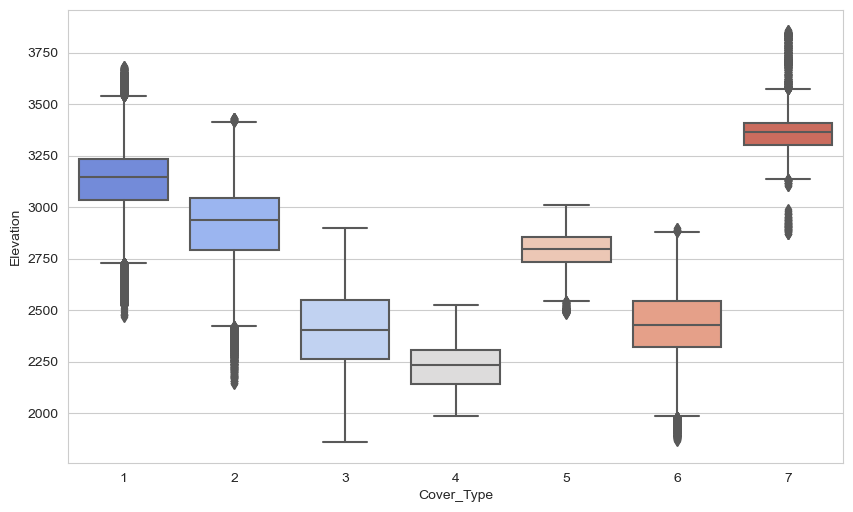

In [30]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Cover_Type', y='Elevation', data=df, palette="coolwarm");

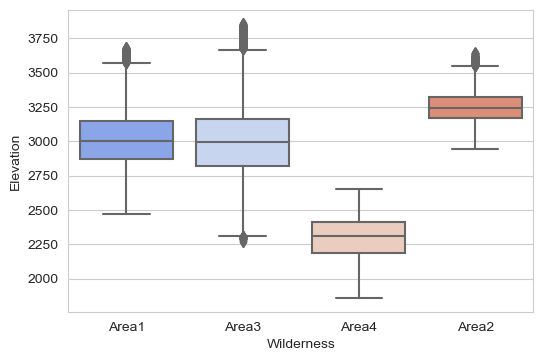

In [31]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Wilderness', y='Elevation', data=df, palette="coolwarm");

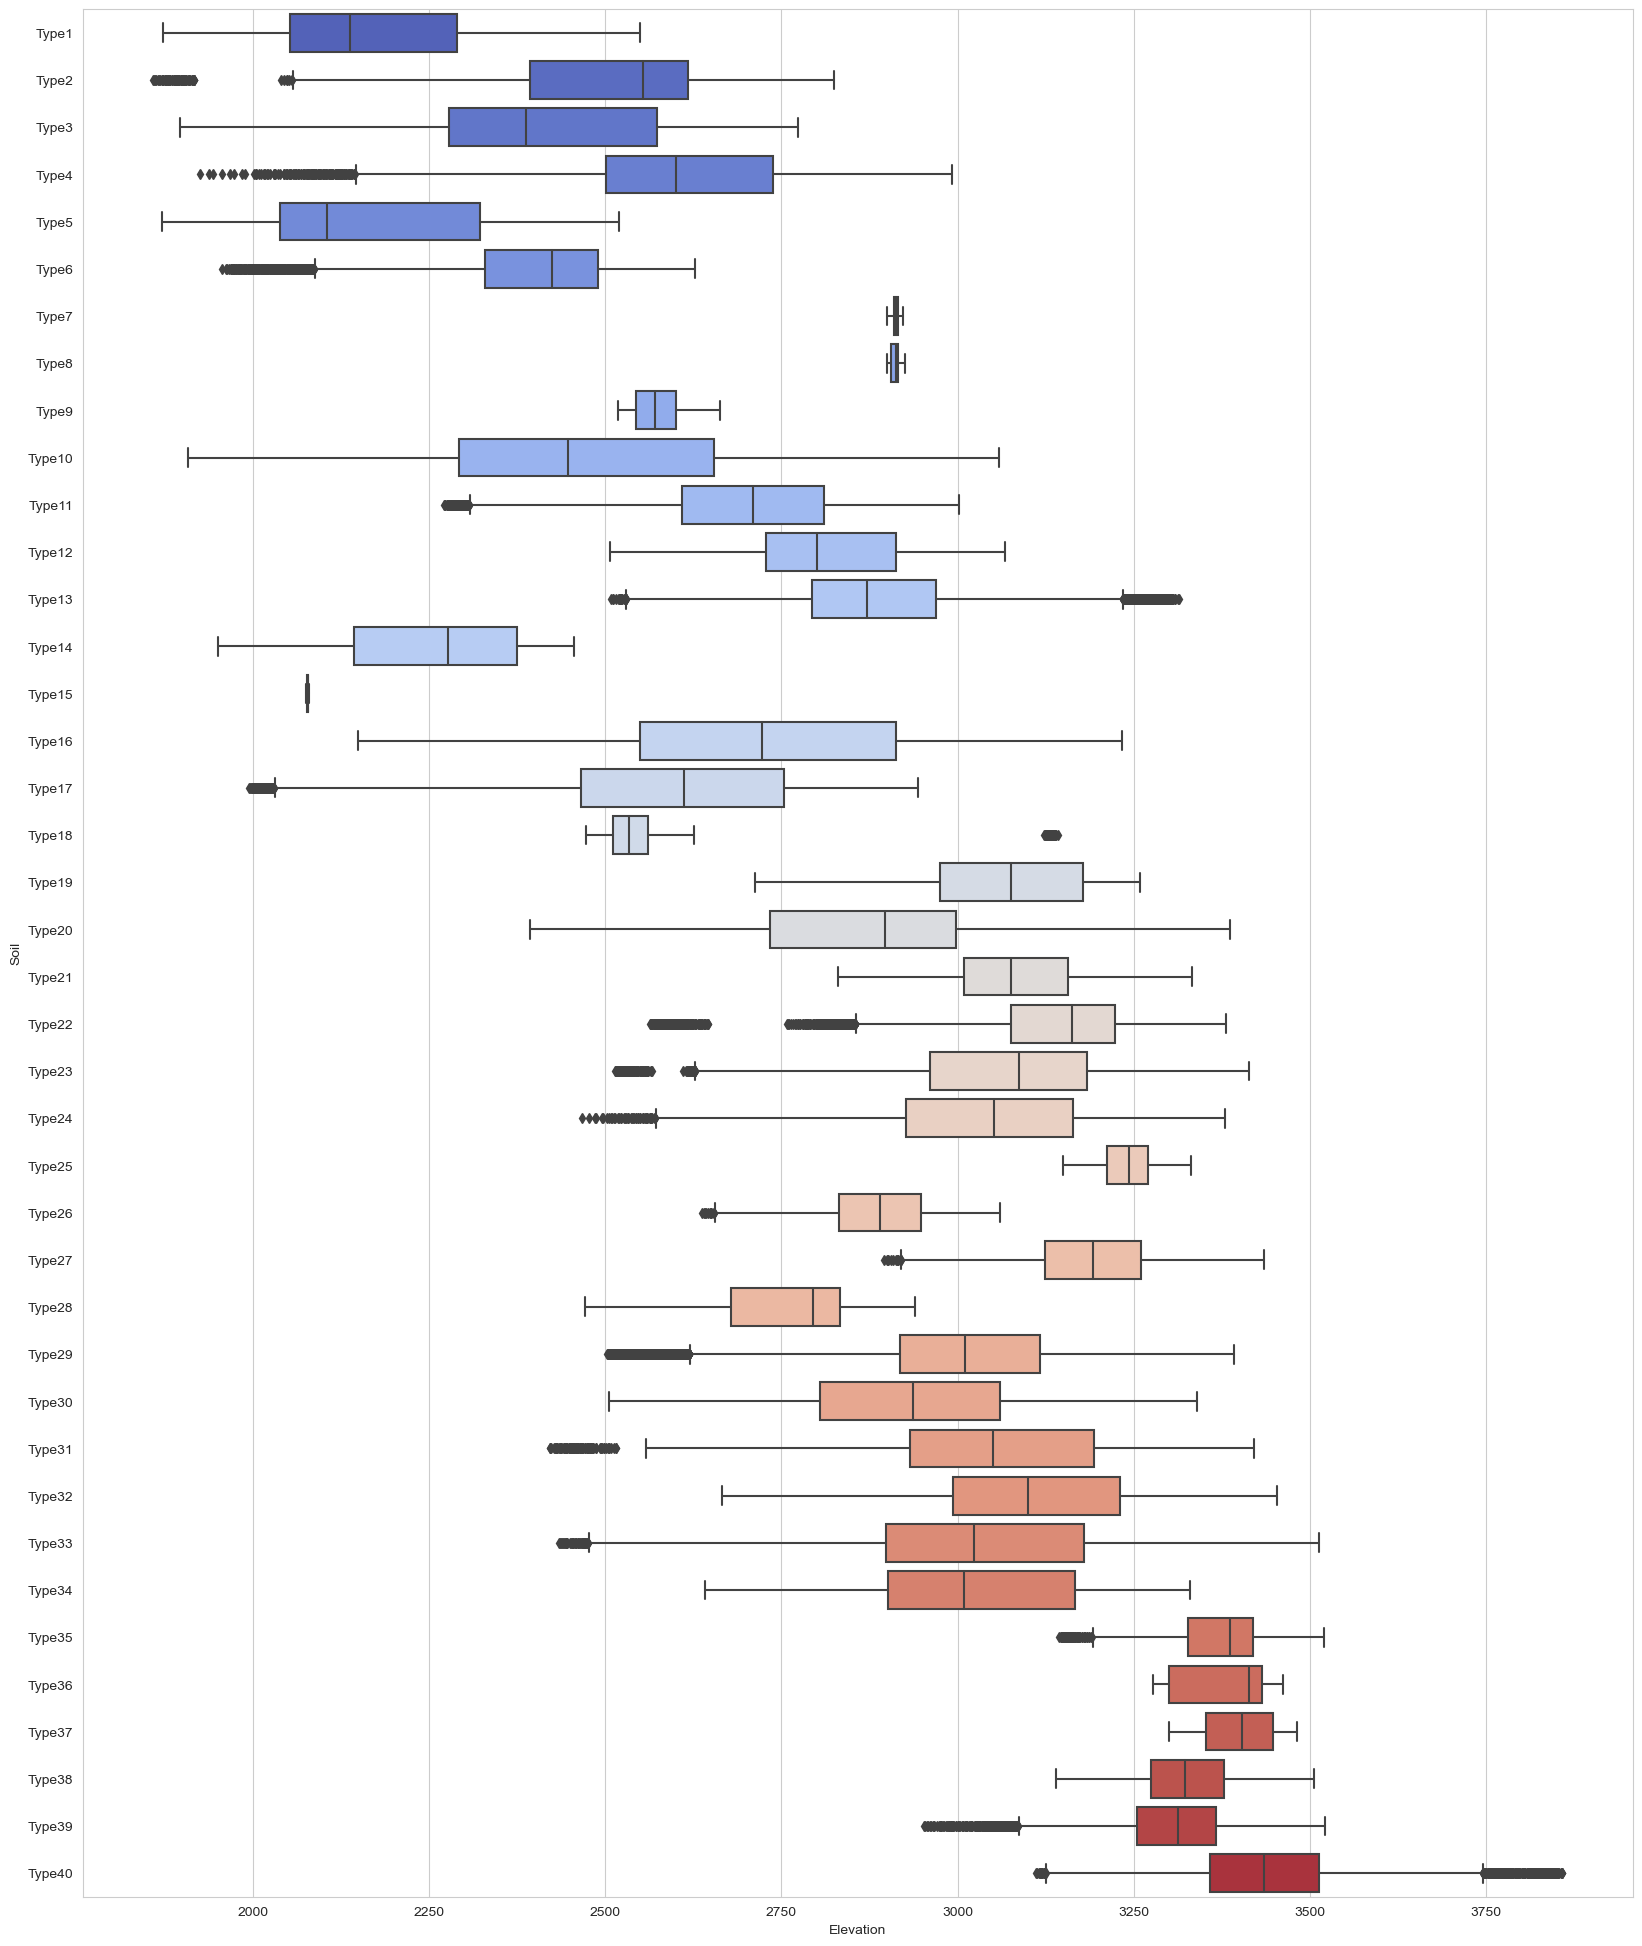

In [32]:
plt.figure(figsize=(20,25))
sns.boxplot(y='Soil', x='Elevation', data=df.sort_values(by=['Soil'], key=lambda col: col.str.extract('(\d+)')[0].astype('float')), orient="h",palette="coolwarm");

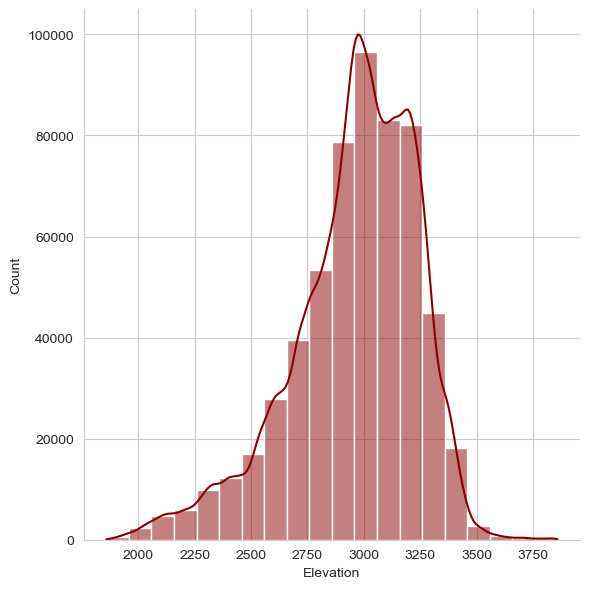

In [33]:
# plt.figure(figsize=(15,15))
sns.displot(df['Elevation'].dropna(), kde=True, height= 6, color='darkred', bins=20);

> **Slope - Cover_Type**

In [34]:
df[["Slope", "Cover_Type"]].groupby(["Cover_Type"], as_index = False).mean()

,Cover_Type,Slope
0,1,13.127110
1,2,13.550499
2,3,20.770208
3,4,18.528941
4,5,16.641315
5,6,19.048886
6,7,14.255924


In [35]:
df.groupby(['Cover_Type', 'Wilderness']).Slope.describe()

count       mean       std  min   25%   50%   75%  \
Cover_Type Wilderness                                                         
1          Area1       105717.0  12.506541  7.077672  0.0   7.0  11.0  16.0   
           Area2        18595.0  13.160796  6.551585  0.0   8.0  12.0  17.0   
           Area3        87528.0  13.869482  6.492078  0.0   9.0  13.0  18.0   
2          Area1       146197.0  11.653721  6.180887  0.0   7.0  11.0  15.0   
           Area2         8985.0  12.243851  5.898695  0.0   8.0  12.0  16.0   
           Area3       125093.0  15.783673  7.481243  0.0  10.0  15.0  20.0   
           Area4         3026.0  16.752479  7.577034  0.0  11.0  16.0  22.0   
3          Area3        14300.0  17.684685  8.309975  0.0  11.0  17.0  24.0   
           Area4        21454.0  22.826839  8.863161  0.0  16.0  23.0  29.0   
4          Area4         2747.0  18.528941  9.347785  0.0  11.0  19.0  26.0   
5          Area1         3781.0  19.623645  8.721643  0.0  13.0  20.0  26.0   
           Area3         5712.0  14.667192  7.211762  0.0   9.0  14.0  19.0   
6          Area3         7626.0  16.970889  7.732219  0.0  11.0  17.0  23.0   
           Area4         9741.0  20.675701  7.742789  0.0  15.0  20.0  26.0   
7          Area1         5101.0  13.817487  7.589274  0.0   8.0  13.0  18.0   
           Area2         2304.0  13.845486  7.157037  0.0   9.0  13.0  18.0   
           Area3        13105.0  14.498741  7.456785  0.0  10.0  13.0  18.0   

                        max  
Cover_Type Wilderness        
1          Area1       56.0  
           Area2       43.0  
           Area3       51.0  
2          Area1       61.0  
           Area2       37.0  
           Area3       66.0  
           Area4       42.0  
3          Area3       50.0  
           Area4       50.0  
4          Area4       46.0  
5          Area1       51.0  
           Area3       40.0  
6          Area3       54.0  
           Area4       44.0  
7          Area1       44.0  
           Area2       41.0  
           Area3       51.0

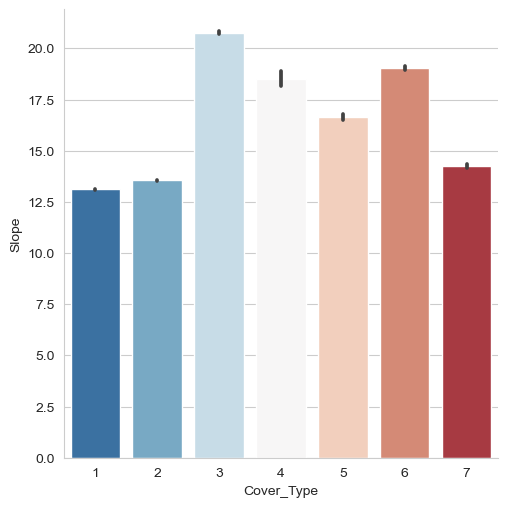

In [36]:
sns.factorplot(x="Cover_Type", y ="Slope", data=df, kind="bar", palette='RdBu_r',size=5);

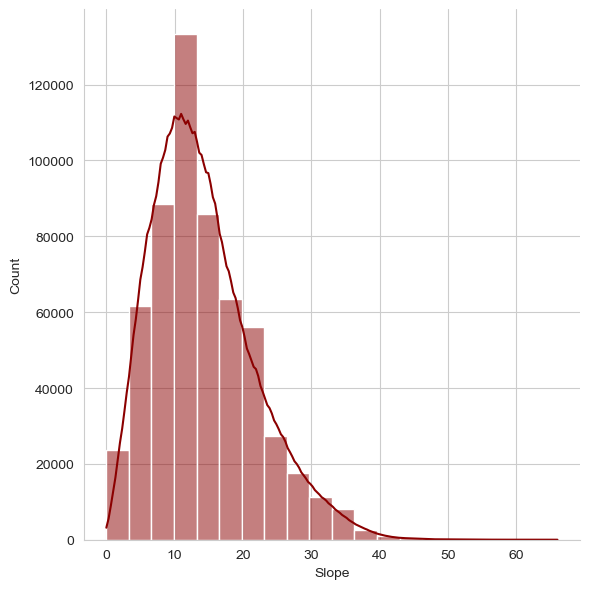

In [37]:
sns.displot(df['Slope'].dropna(), kde=True,height= 6,color='darkred',bins=20);

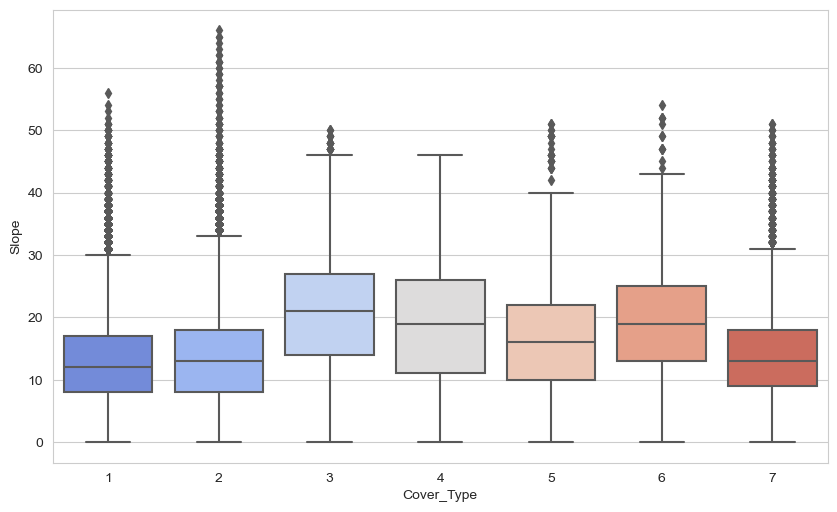

In [38]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Cover_Type', y='Slope', data=df, palette="coolwarm");

> **Horizontal_Distance_To_Roadways - Cover_Type**

In [39]:
df[["Horizontal_Distance_To_Roadways", "Cover_Type"]].groupby(["Cover_Type"], as_index = False).mean()

,Cover_Type,Horizontal_Distance_To_Roadways
0,1,2614.834517
1,2,2429.530799
2,3,943.940734
3,4,914.199490
4,5,1349.765722
5,6,1037.169805
6,7,2738.250463


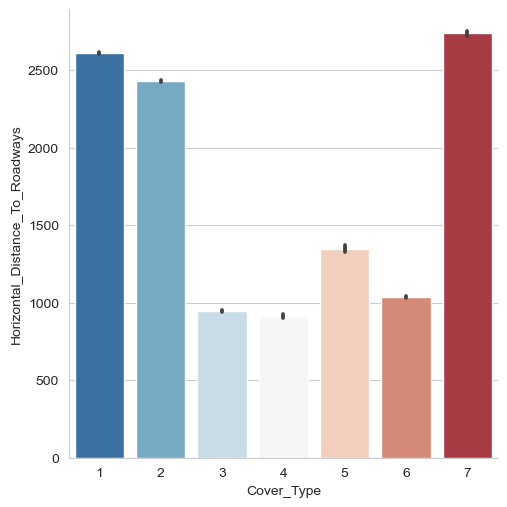

In [40]:
sns.factorplot(x="Cover_Type", y ="Horizontal_Distance_To_Roadways", data=df, kind="bar", palette='RdBu_r',size=5);

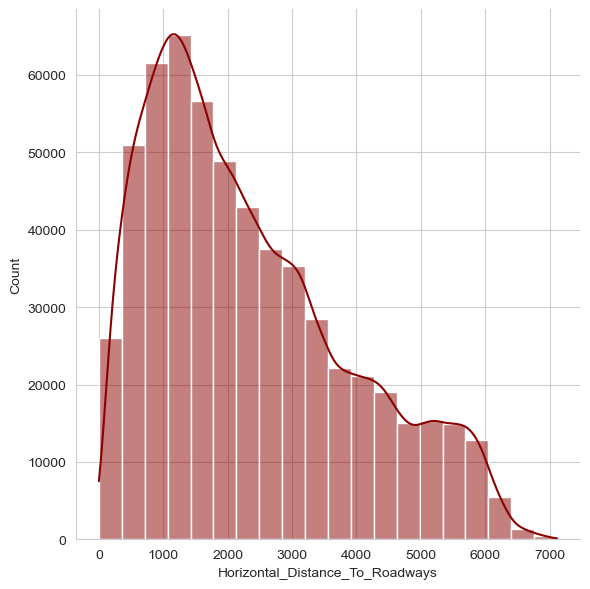

In [41]:
sns.displot(df['Horizontal_Distance_To_Roadways'].dropna(), kde=True,height= 6,color='darkred',bins=20);

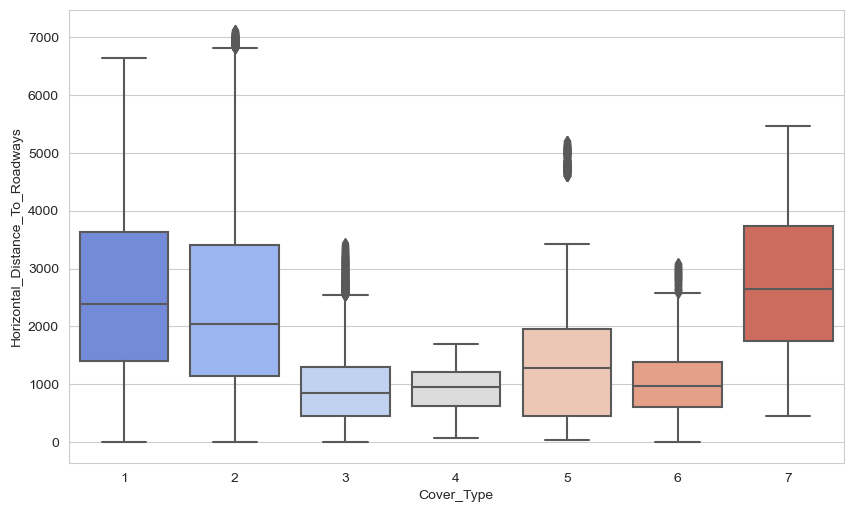

In [42]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Cover_Type', y='Horizontal_Distance_To_Roadways', data=df, palette="coolwarm");

> **Horizontal_Distance_To_Fire_Points - Cover_Type**

In [43]:
df[["Horizontal_Distance_To_Fire_Points", "Cover_Type"]].groupby(["Cover_Type"], as_index = False).mean()

,Cover_Type,Horizontal_Distance_To_Fire_Points
0,1,2009.253517
1,2,2168.154849
2,3,910.955949
3,4,859.124135
4,5,1577.719794
5,6,1055.351471
6,7,2070.031594


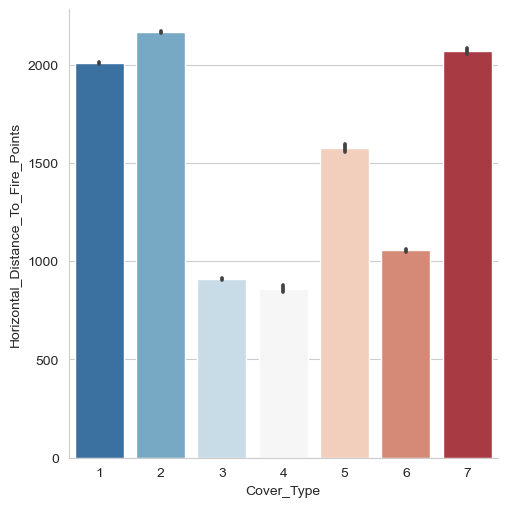

In [44]:
sns.factorplot(x="Cover_Type", y ="Horizontal_Distance_To_Fire_Points", data=df, kind="bar", palette='RdBu_r',size=5);

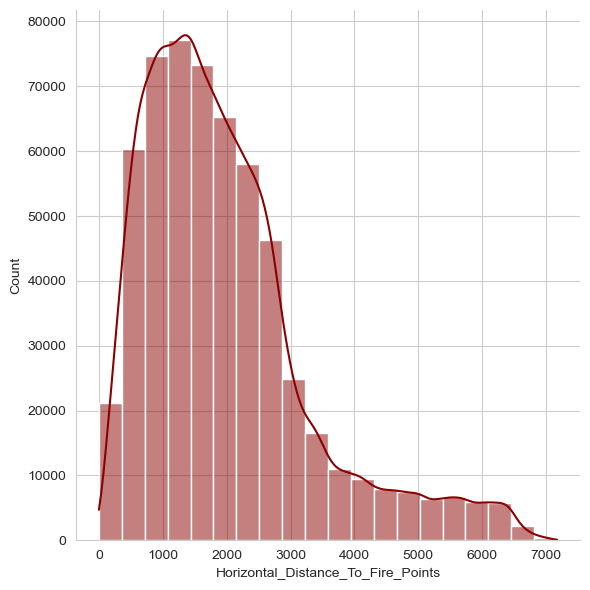

In [45]:
sns.displot(df['Horizontal_Distance_To_Fire_Points'].dropna(), kde=True,height= 6,color='darkred',bins=20);

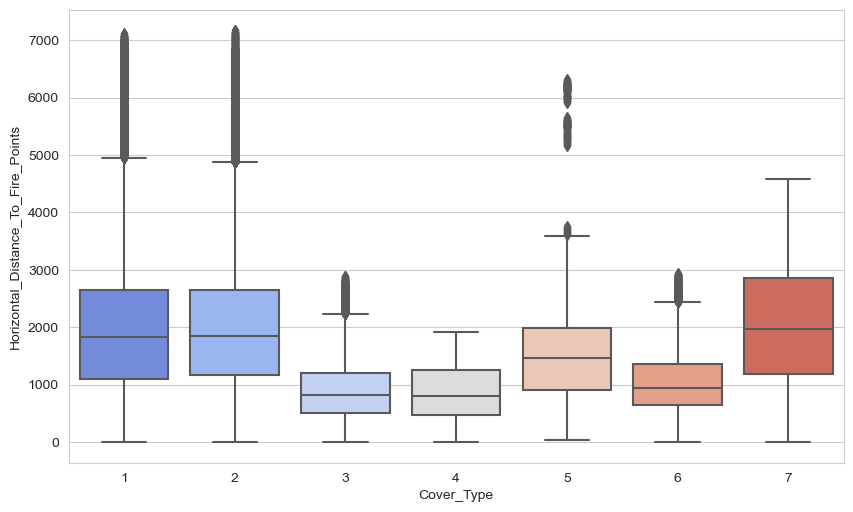

In [46]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Cover_Type', y='Horizontal_Distance_To_Fire_Points', data=df, palette="coolwarm");

## 2.  Data Cleaning

### Detect Missing Values and Outliers

#### *i. Missing Value Detection*

In [47]:
df.isnull().sum().any()

False

In [48]:
# numeric = []
# for col in df.columns:
#     if df[col].nunique() > 7 : numeric.append(col)
# print(numeric)

In [49]:
# features = df.loc[:,'Elevation':'Horizontal_Distance_To_Fire_Points']

#### *ii. Outlier Detection*

The columns which have continuous value should be examined in terms of [outliers](https://datascience.foundation/sciencewhitepaper/knowing-all-about-outliers-in-machine-learning) (Watch out for columns that look like continuous but not continuous!). Some algorithms are [sensitive to outliers](https://arsrinevetha.medium.com/ml-algorithms-sensitivity-towards-outliers-f3862a13c94d), but some algorithms can tolerate them. You can decide to outlier detection according to the algorithm you will use.
- You can check the outliers shape of continous features with respect to the target (Cover_Type) classes.
- You can check how many outliers are there of each continuous variables.

In [50]:
df.shape

(581012, 13)

In [51]:
df.corr()["Cover_Type"].sort_values(ascending=False)

Cover_Type                            1.000000
Slope                                 0.148285
Vertical_Distance_To_Hydrology        0.081664
Aspect                                0.017080
Horizontal_Distance_To_Hydrology     -0.020317
Hillshade_9am                        -0.035415
Hillshade_3pm                        -0.048290
Hillshade_Noon                       -0.096426
Horizontal_Distance_To_Fire_Points   -0.108936
Horizontal_Distance_To_Roadways      -0.153450
Elevation                            -0.269554
Name: Cover_Type, dtype: float64

In [52]:
df.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Cover_Type', 'Soil',
       'Wilderness'],
      dtype='object')

In [53]:
def col_plot(df,col_name):
    plt.figure(figsize=(15,6))
    
    plt.subplot(141) # 1 satir x 4 sutun dan olusan ax in 1. sutununda calis
    plt.hist(df[col_name], bins = 20)
    f=lambda x:(np.sqrt(x) if x>=0 else -np.sqrt(-x))
    
    # üç sigma aralikta(verinin %99.7 sini icine almasi beklenen bolum) iki kirmizi cizgi arasinda
    plt.axvline(x=df[col_name].mean() + 3*df[col_name].std(),color='red')
    plt.axvline(x=df[col_name].mean() - 3*df[col_name].std(),color='red')
    plt.xlabel(col_name)
    plt.tight_layout
    plt.xlabel("Histogram ±3z")
    plt.ylabel(col_name)

    plt.subplot(142)
    plt.boxplot(df[col_name]) # IQR katsayisi, defaultu 1.5
    plt.xlabel("IQR=1.5")

    plt.subplot(143)
    plt.boxplot(df[col_name].apply(f), whis = 2.5)
    plt.xlabel("ROOT SQUARE - IQR=2.5")

    plt.subplot(144)
    plt.boxplot(np.log(df[col_name]+0.1), whis = 2.5)
    plt.xlabel("LOGARITMIC - IQR=2.5")
    plt.show()

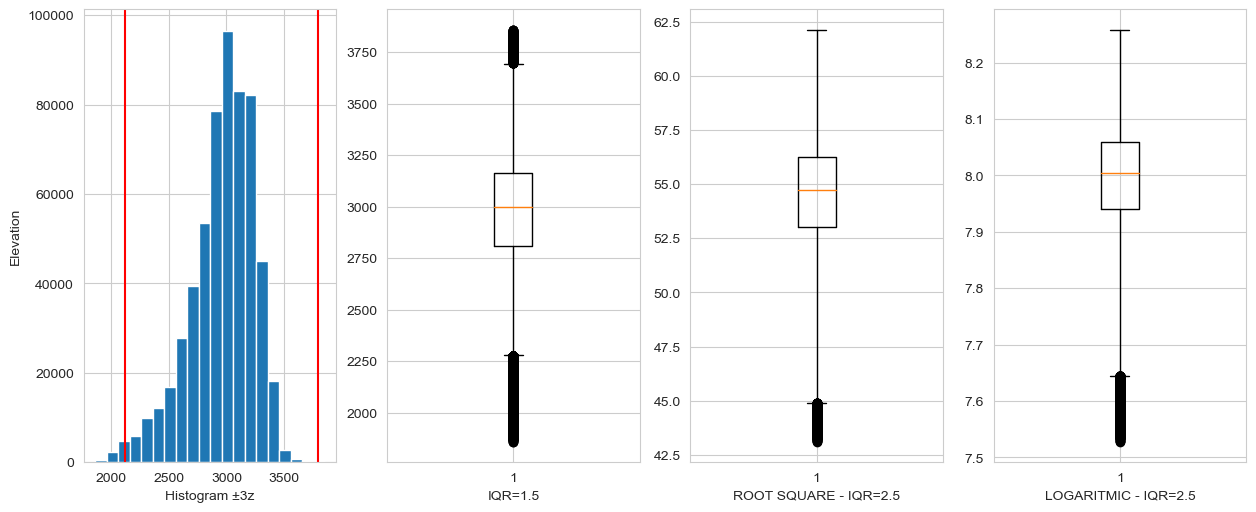

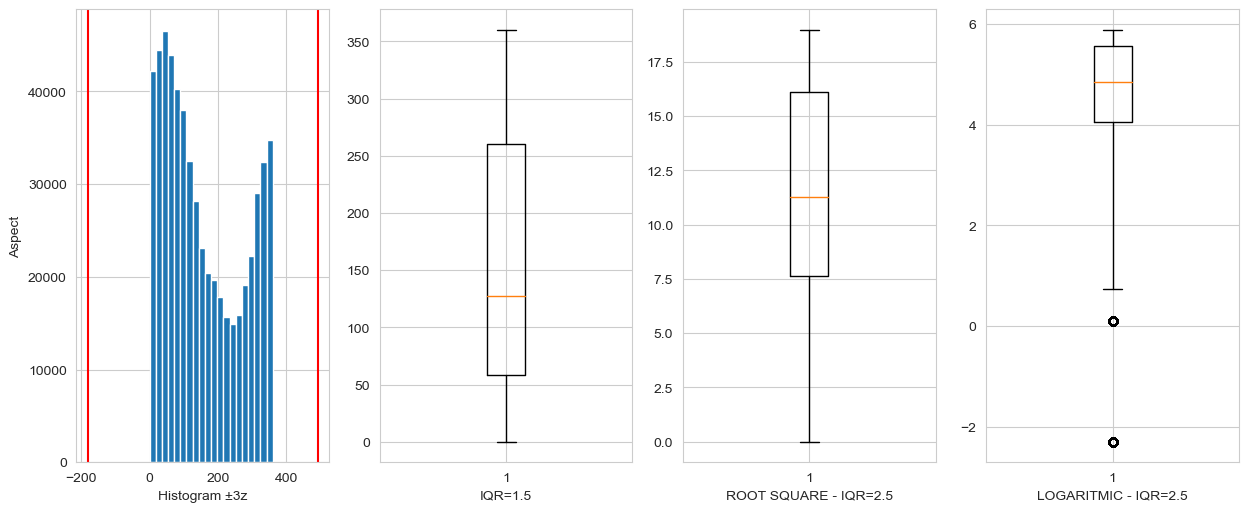

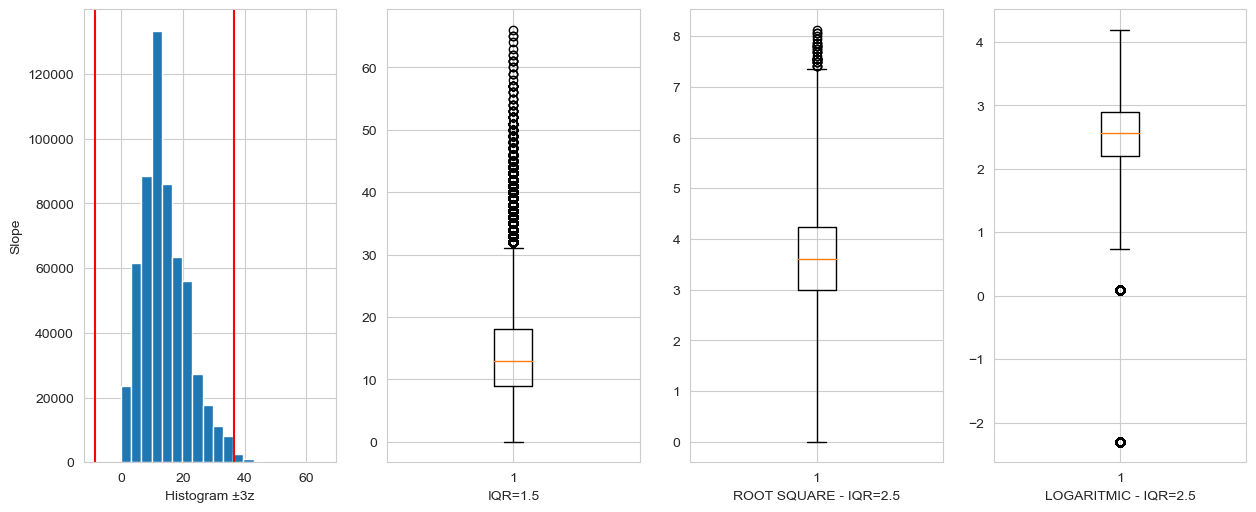

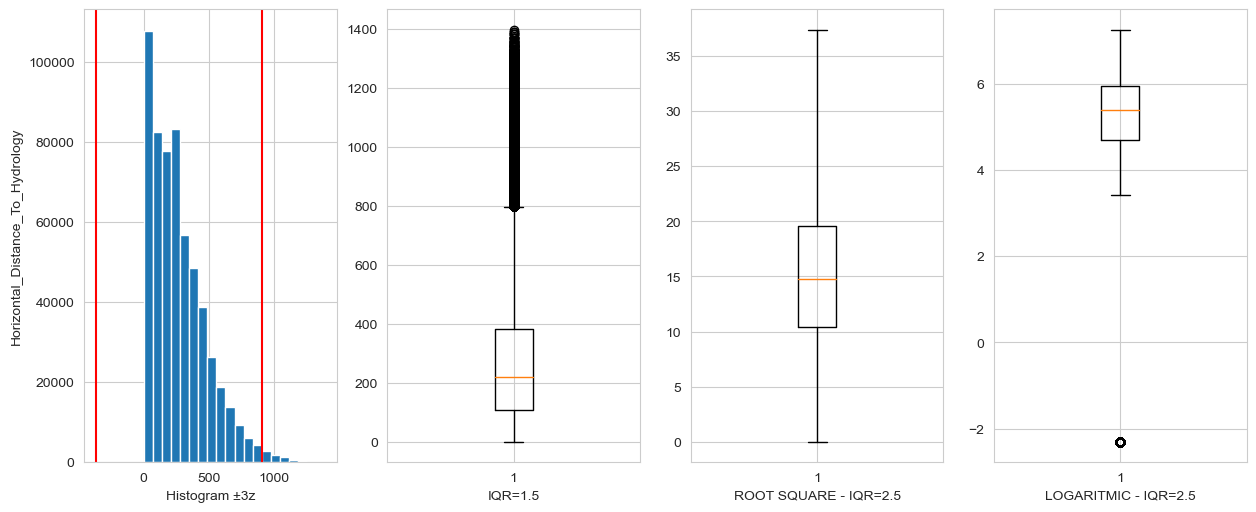

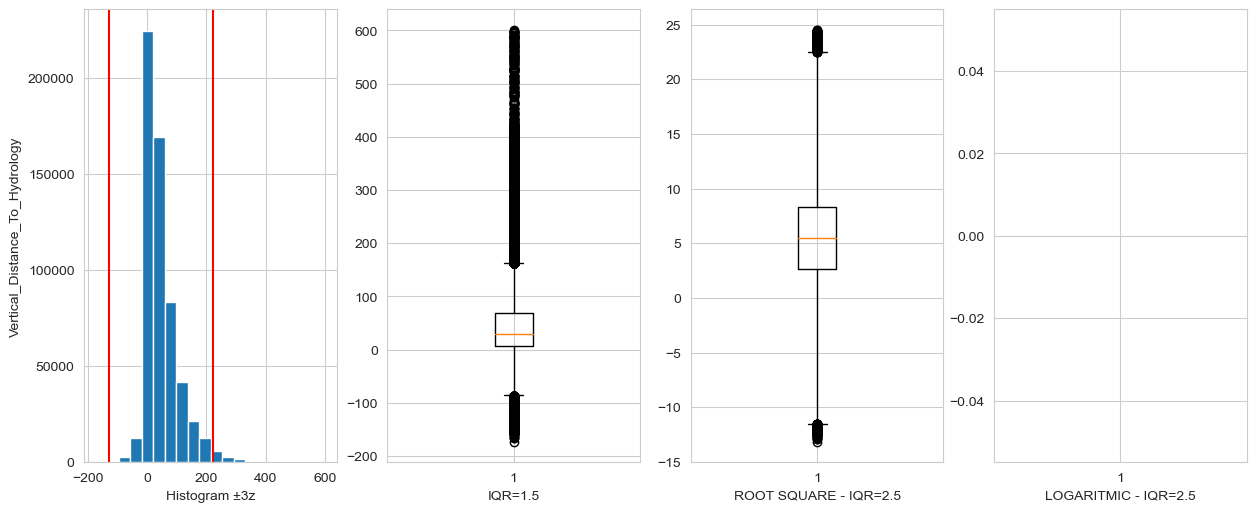

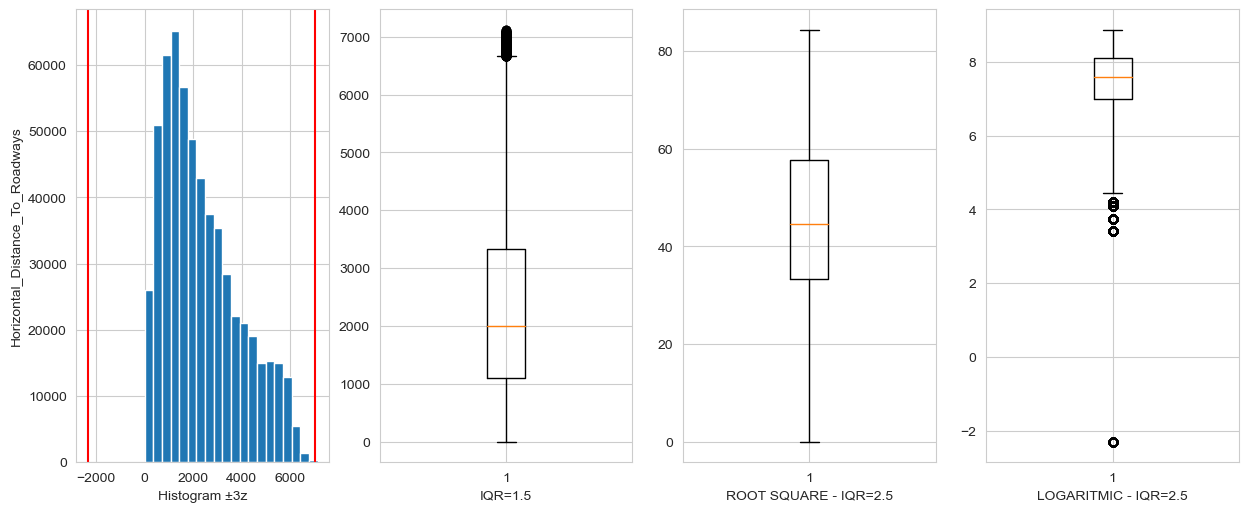

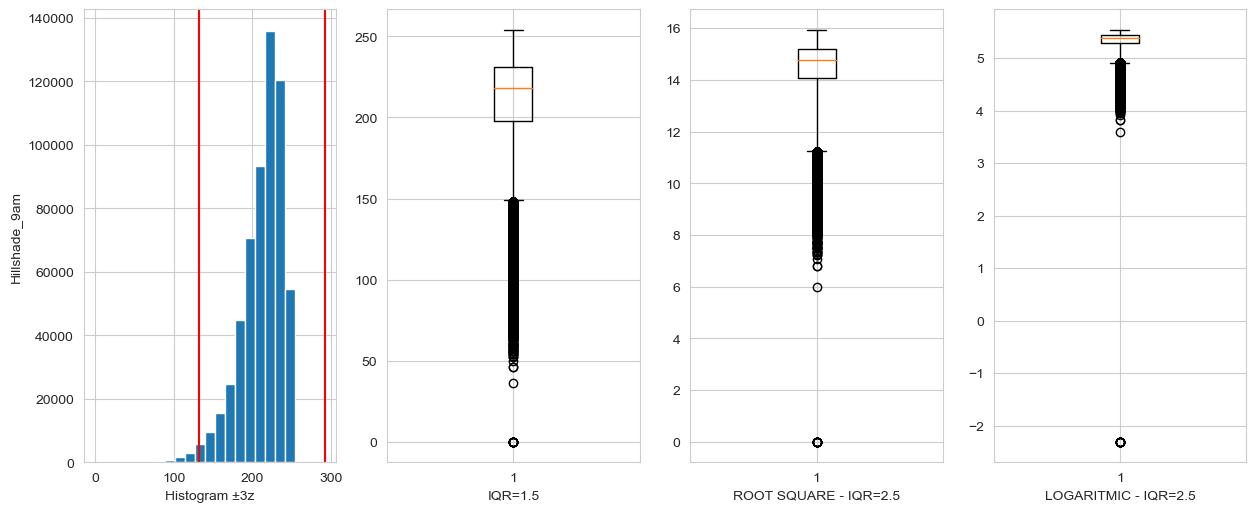

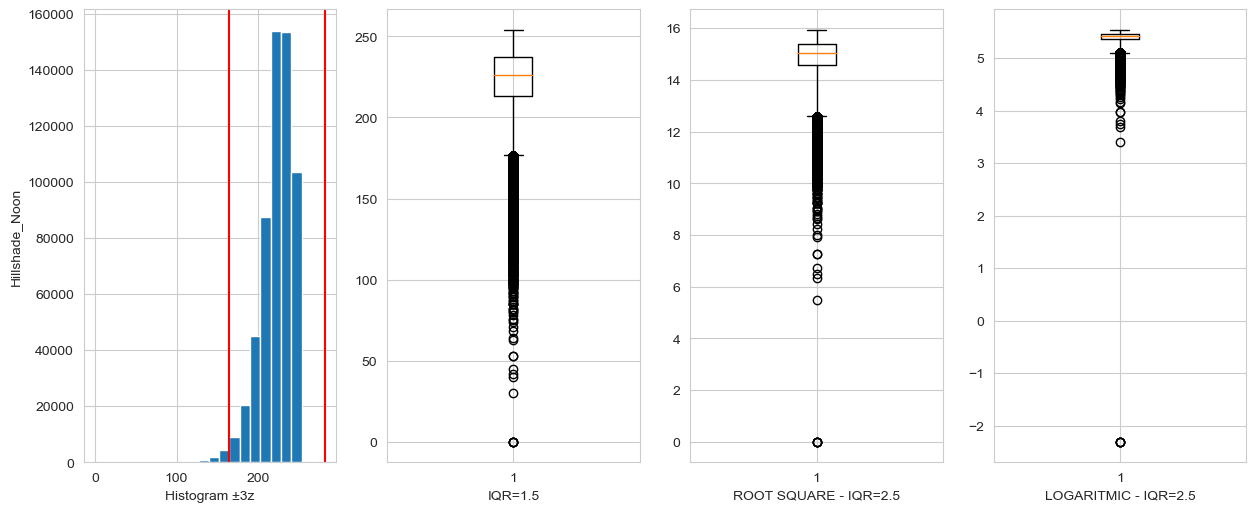

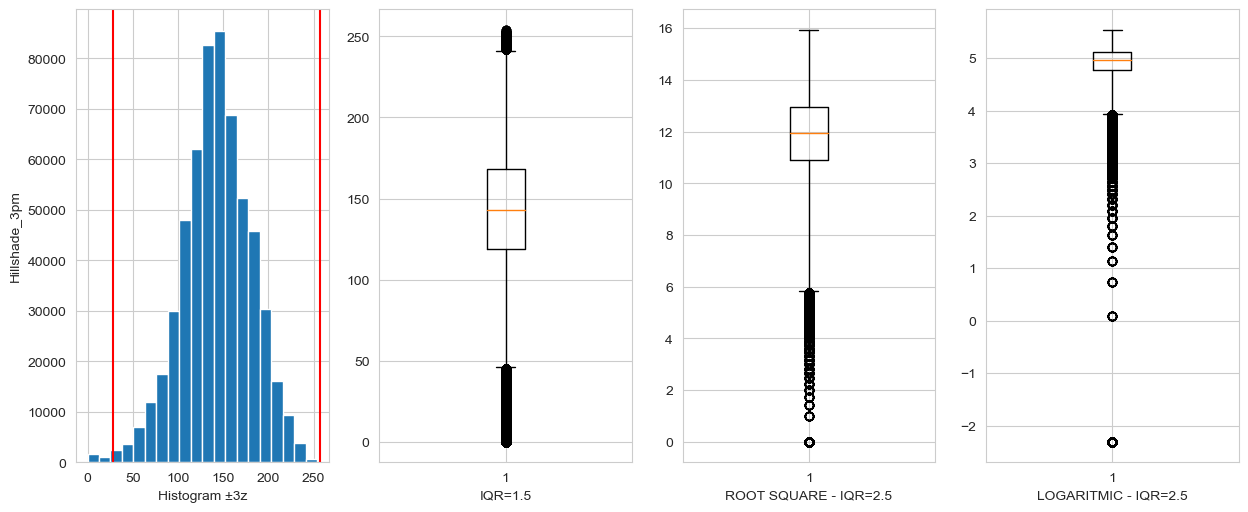

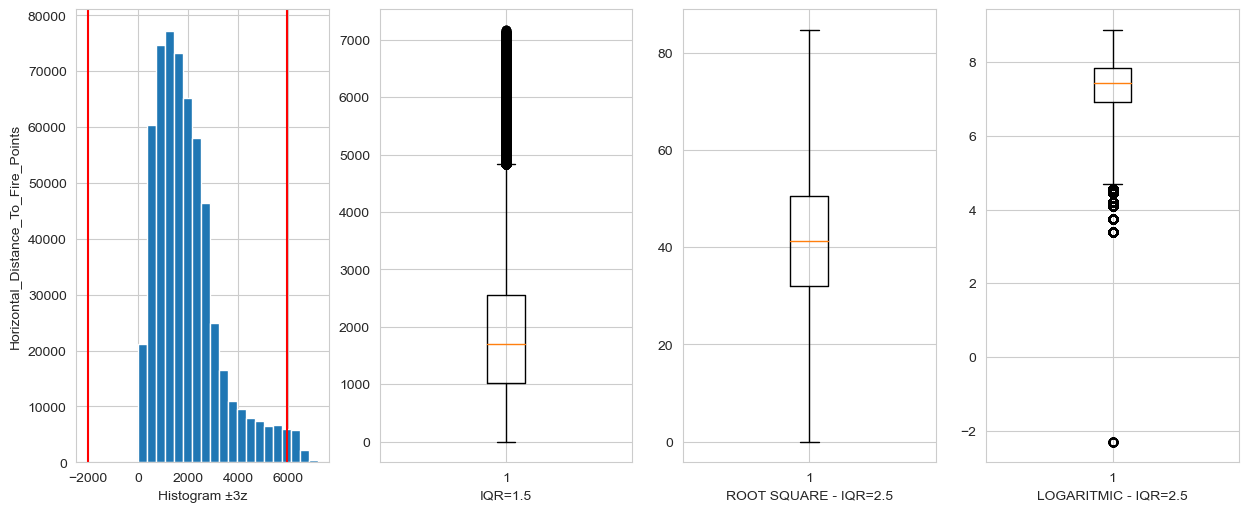

In [54]:
for i in df.columns[:-3]:
    col_plot(df,i)

In [55]:
from scipy.stats.mstats import winsorize

def plot_winsorize(df,col_name,up=0.1,down=0):
    plt.figure(figsize = (15, 6))

    winsor=winsorize(df[col_name], (down,up))
    logr=np.log(df[col_name]+0.1)

    plt.subplot(141)
    plt.hist(winsor, bins = 22)
    plt.axvline(x=winsor.mean()+3*winsor.std(),color='red')
    plt.axvline(x=winsor.mean()-3*winsor.std(),color='red')
    plt.xlabel('Winsorize_Histogram')
    plt.ylabel(col_name)
    plt.tight_layout

    plt.subplot(142)
    plt.boxplot(winsor, whis = 1.5)
    plt.xlabel('Winsorize - IQR:1.5')
    
    plt.subplot(143)
    plt.hist(logr, bins=22)
    plt.axvline(x=logr.mean()+3*logr.std(),color='red')
    plt.axvline(x=logr.mean()-3*logr.std(),color='red')
    plt.xlabel('Logr_col_name')

    plt.subplot(144)
    plt.boxplot(logr, whis = 1.5)
    plt.xlabel("Logaritmic - IQR=1.5")
    plt.show()    


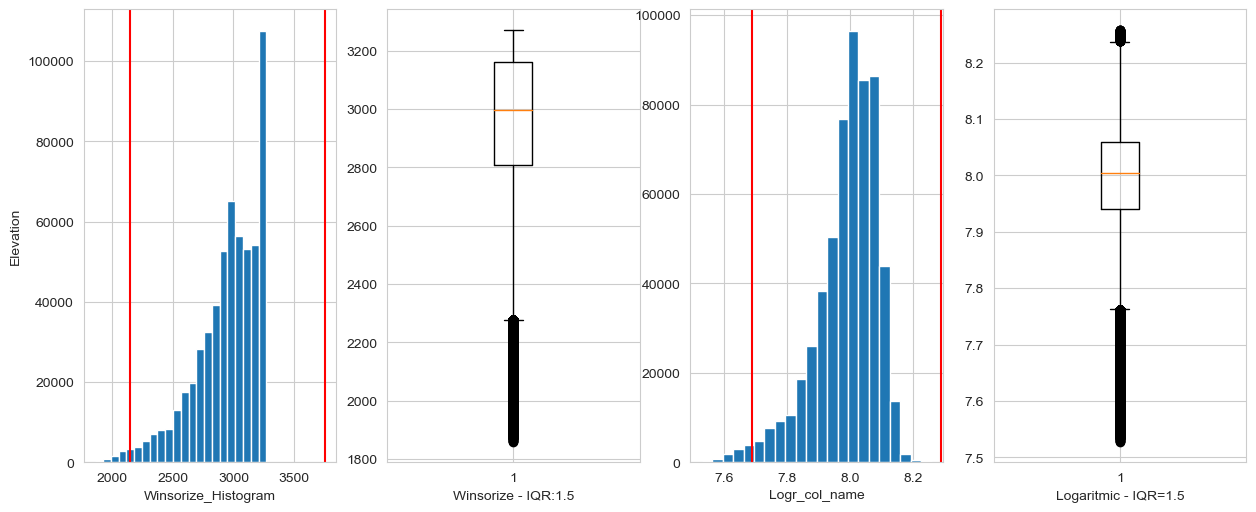

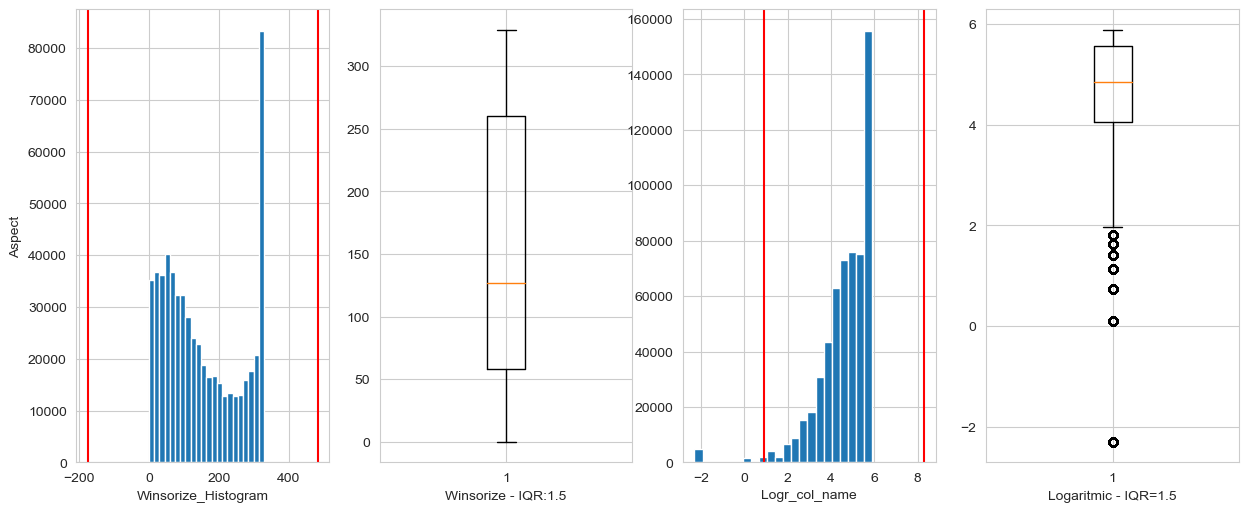

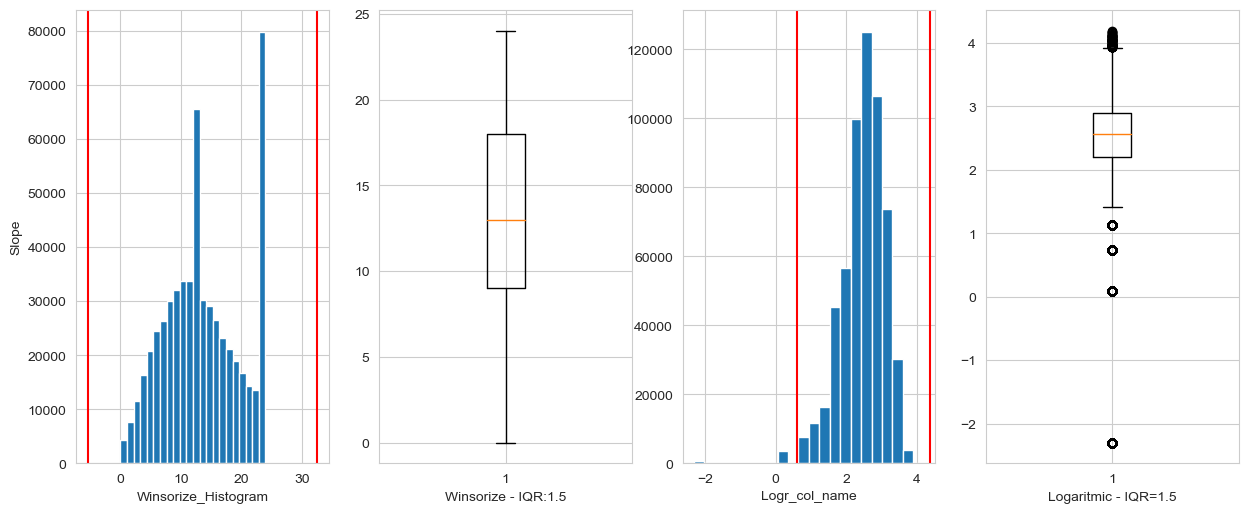

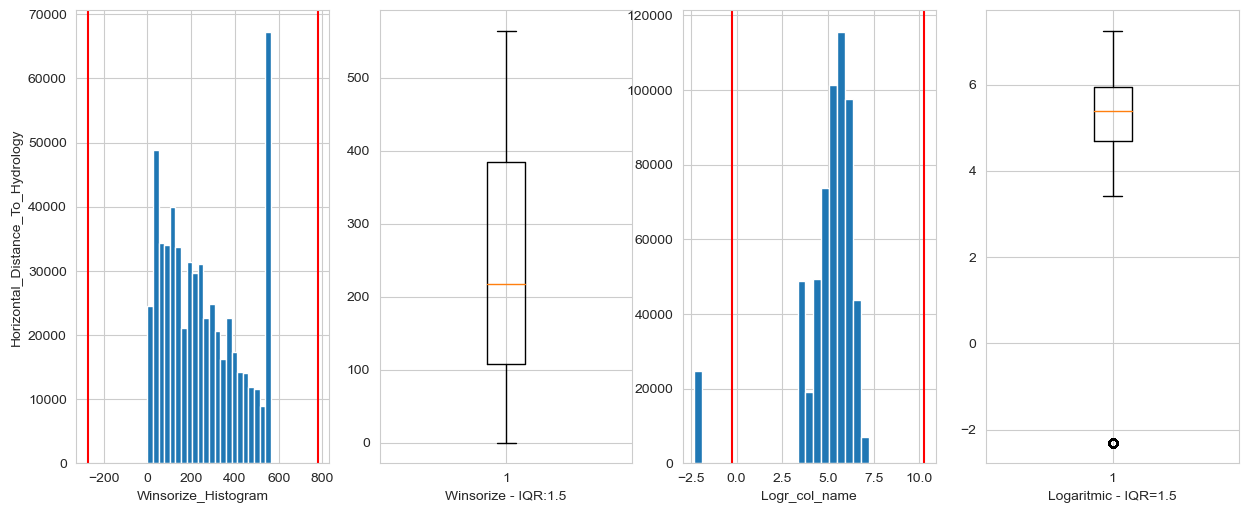

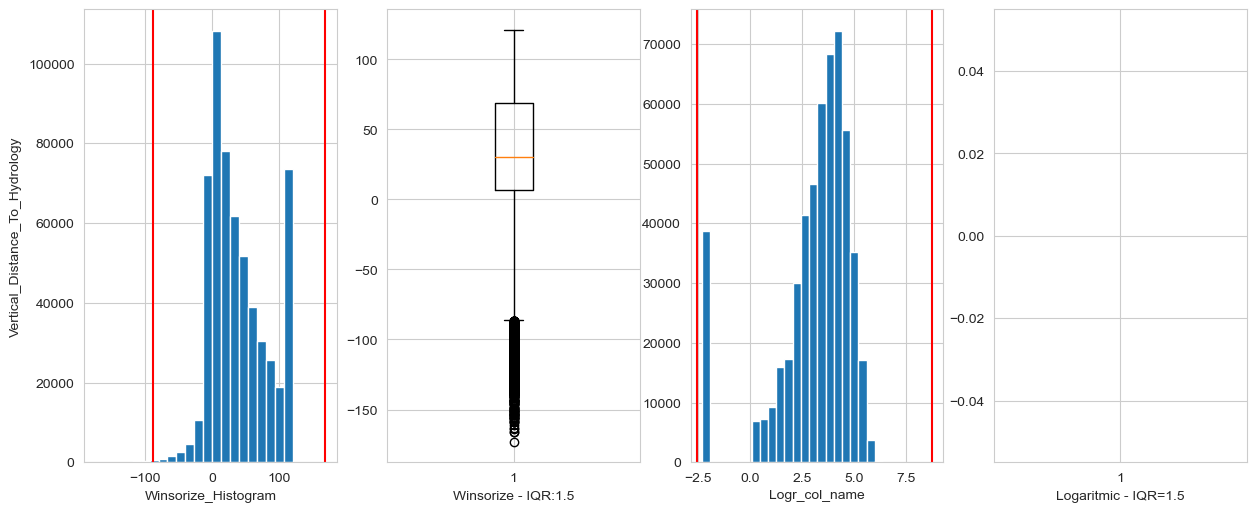

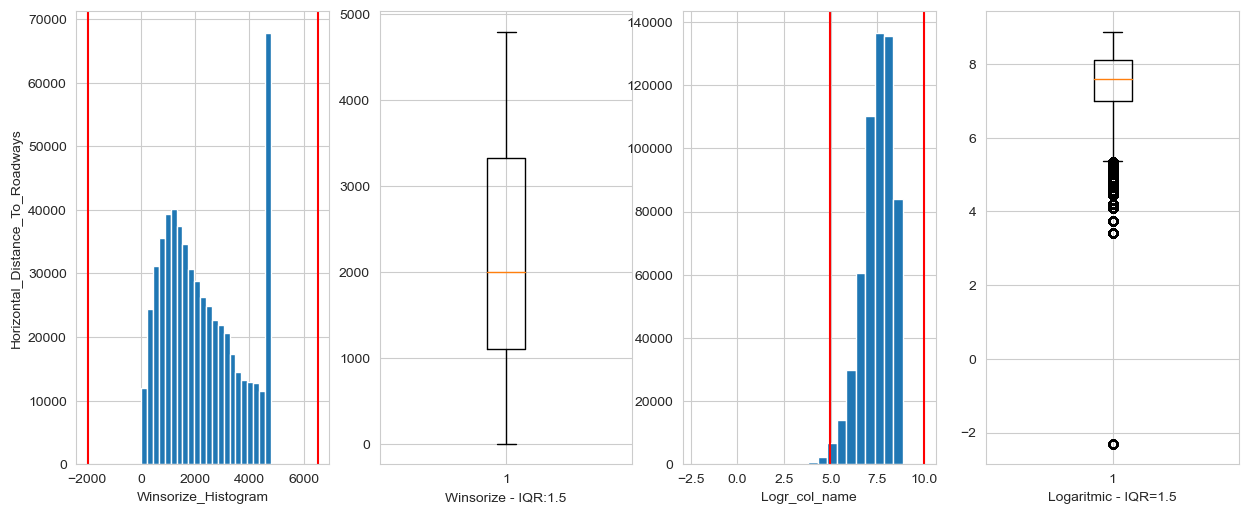

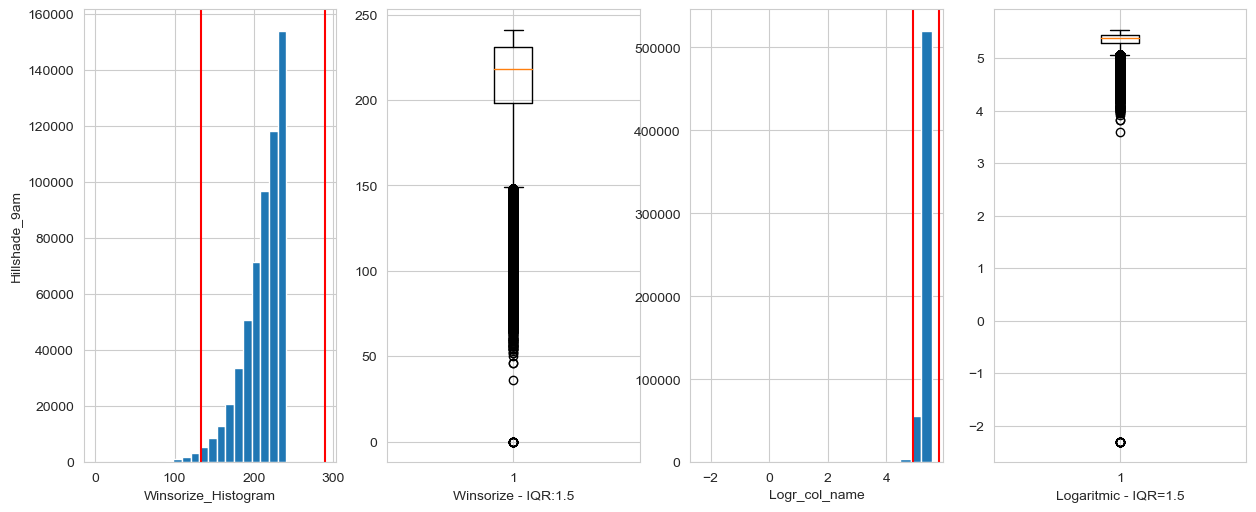

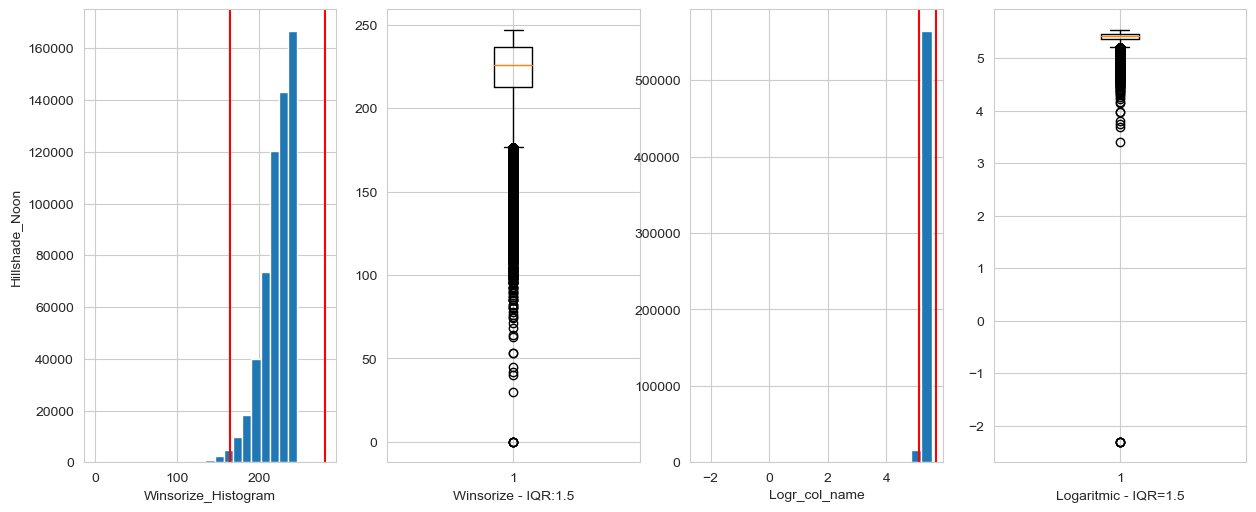

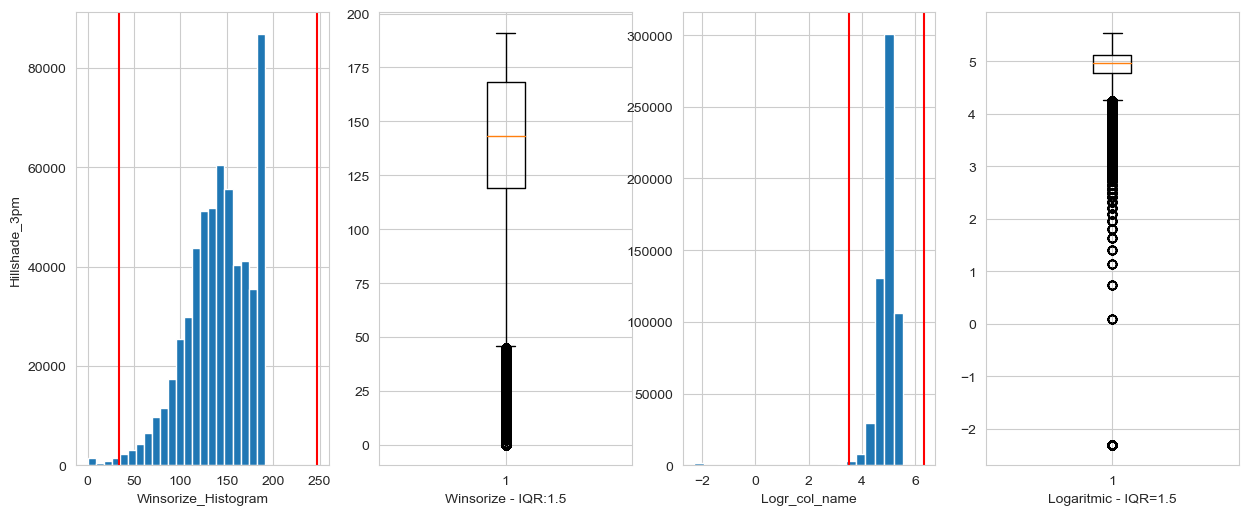

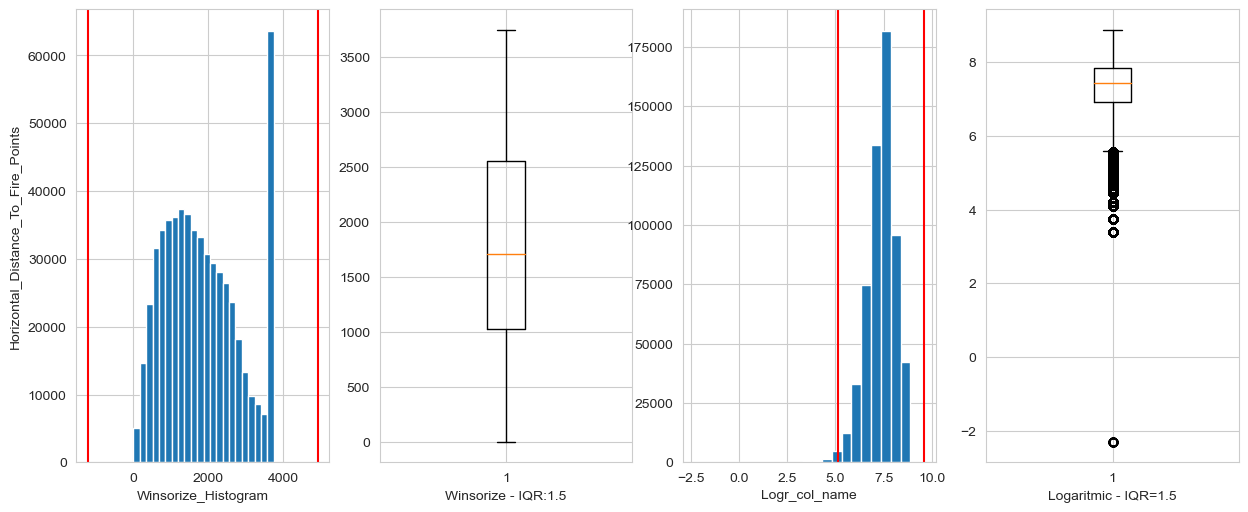

In [56]:

for i in df.columns[:-3]:
    plot_winsorize(df,i)

In [57]:
features=['Elevation', 
#            'Aspect', # angle
           'Slope', 
           'Horizontal_Distance_To_Hydrology',
           'Vertical_Distance_To_Hydrology',
           'Horizontal_Distance_To_Roadways', # not expected normal distribution
#            'Hillshade_9am', # bitwise
#            'Hillshade_Noon',
#            'Hillshade_3pm',
           'Horizontal_Distance_To_Fire_Points']

In [58]:
df_winsorised=df.copy()
for i in features:
    df_winsorised[i]=winsorize(df_winsorised[i], (0,0.1))

In [59]:
df_log=df.copy()
for i in features:
    df_log[i]=np.log(df_log[i])

In [60]:
df_root=df.copy()
f=lambda x:(np.sqrt(x) if x>=0 else -np.sqrt(-x))
for i in features:
    df_root[i]=df_root[i].apply(f)

### Deal with Outliers

#### *i. Visualize Zscore Tresholds (how many times IQR) by Continuous Variables*

There are many different methods for outliers. You can use IQR values used as standard to deal with outliers, or you can define two functions to help you understand the outliers and how you can deal with them.
- Two functions given as extra for outlier detection in *EDA Project (Auto Scout)* are given below.

In [61]:
from numpy import percentile
from scipy.stats import zscore
from scipy import stats

def outlier_zscore(df, col, min_z=1, max_z = 5, step = 0.1, print_list = False):
    z_scores = zscore(df[col].dropna())
    threshold_list = []
    for threshold in np.arange(min_z, max_z, step):
        threshold_list.append((threshold, len(np.where(z_scores > threshold)[0])))
        df_outlier = pd.DataFrame(threshold_list, columns = ['threshold', 'outlier_count'])
        df_outlier['pct'] = (df_outlier.outlier_count - df_outlier.outlier_count.shift(-1))/df_outlier.outlier_count*100
    plt.plot(df_outlier.threshold, df_outlier.outlier_count)
    best_treshold = round(df_outlier.iloc[df_outlier.pct.argmax(), 0],2)
    outlier_limit = int(df[col].dropna().mean() + (df[col].dropna().std()) * df_outlier.iloc[df_outlier.pct.argmax(), 0])
    percentile_threshold = stats.percentileofscore(df[col].dropna(), outlier_limit)
    plt.vlines(best_treshold, 0, df_outlier.outlier_count.max(), 
               colors="r", ls = ":"
              )
    plt.annotate("Zscore : {}\nValue : {}\nPercentile : {}".format(best_treshold, outlier_limit, 
                                                                   (np.round(percentile_threshold, 3), 
                                                                    np.round(100-percentile_threshold, 3))), 
                 (best_treshold, df_outlier.outlier_count.max()/2))
    #plt.show()
    if print_list:
        print(df_outlier)
    return (plt, df_outlier, best_treshold, outlier_limit, percentile)

In [62]:
from scipy.stats import zscore
from scipy import stats

def outlier_inspect(df, col, min_z=1, max_z = 5, step = 0.5, max_hist = None, bins = 50):
    fig = plt.figure(figsize=(20, 6))
    fig.suptitle(col, fontsize=16)
    plt.subplot(1,3,1)
    if max_hist == None:
        sns.distplot(df[col], kde=False, bins = 50)
    else :
        sns.distplot(df[df[col]<=max_hist][col], kde=False, bins = 50)
   
    plt.subplot(1,3,2)
    sns.boxplot(df[col])
    plt.subplot(1,3,3)
    z_score_inspect = outlier_zscore(df, col, min_z=min_z, max_z = max_z, step = step)
    
    plt.subplot(1,3,1)
    plt.axvline(x=df[col].mean() + z_score_inspect[2]*df[col].std(),color='red',linewidth=1,linestyle ="--")
    plt.axvline(x=df[col].mean() - z_score_inspect[2]*df[col].std(),color='red',linewidth=1,linestyle ="--")
    plt.show()
    
    return z_score_inspect

In [63]:
def detect_outliers(df:pd.DataFrame, col_name:str, p=1.5) ->int:
    ''' 
    this function detects outliers based on 3 time IQR and
    returns the number of lower and uper limit and number of outliers respectively
    '''
    first_quartile = np.percentile(np.array(df[col_name].tolist()), 25)
    third_quartile = np.percentile(np.array(df[col_name].tolist()), 75)
    IQR = third_quartile - first_quartile
                      
    upper_limit = third_quartile+(p*IQR)
    lower_limit = first_quartile-(p*IQR)
    outlier_count = 0
                      
    for value in df[col_name].tolist():
        if (value < lower_limit) | (value > upper_limit):
            outlier_count +=1
    return lower_limit, upper_limit, outlier_count

In [64]:
print("Number of Outliers for k*IQR\n")
k=3

total=0
for col in features:
    if detect_outliers(df, col)[2] > 0:
        outliers=detect_outliers(df, col, k)[2]
        total+=outliers
        print("{} outliers in '{}'".format(outliers,col))
print("\n{} OUTLIERS TOTALLY".format(total))

Number of Outliers for k*IQR

0 outliers in 'Elevation'
275 outliers in 'Slope'
414 outliers in 'Horizontal_Distance_To_Hydrology'
5339 outliers in 'Vertical_Distance_To_Hydrology'
0 outliers in 'Horizontal_Distance_To_Roadways'
10 outliers in 'Horizontal_Distance_To_Fire_Points'

6038 OUTLIERS TOTALLY


In [65]:
k=2
print(f"Number of Outliers for {k}*IQR after Winsorised\n")

total=0
for col in features:
    if detect_outliers(df_winsorised, col)[2] > 0:
        outliers=detect_outliers(df_winsorised, col, k)[2]
        total+=outliers
        print("{} outliers in '{}'".format(outliers,col))
print("\n{} OUTLIERS TOTALLY".format(total))

Number of Outliers for 2*IQR after Winsorised

4729 outliers in 'Elevation'
313 outliers in 'Vertical_Distance_To_Hydrology'

5042 OUTLIERS TOTALLY


In [66]:
k=3
print(f"Number of Outliers for {k}*IQR after Logarithmed\n")

total=0
for col in features:
    if detect_outliers(df_log, col)[2] > 0:
        outliers=detect_outliers(df_log, col, k)[2]
        total+=outliers
        print("{} outliers in '{}'".format(outliers,col))
print("\n{} OUTLIERS TOTALLY".format(total))

Number of Outliers for 3*IQR after Logarithmed

724 outliers in 'Elevation'
4336 outliers in 'Slope'
24603 outliers in 'Horizontal_Distance_To_Hydrology'
437 outliers in 'Horizontal_Distance_To_Roadways'
670 outliers in 'Horizontal_Distance_To_Fire_Points'

30770 OUTLIERS TOTALLY


In [67]:
k=2.2
print(f"Number of Outliers for {k}*IQR after Root Square\n")

total=0
for col in features:
    if detect_outliers(df_root, col)[2] > 0:
        outliers=detect_outliers(df_root, col, k)[2]
        total+=outliers
        print("{} outliers in '{}'".format(outliers,col))
print("\n{} OUTLIERS TOTALLY".format(total))

Number of Outliers for 2.2*IQR after Root Square

4928 outliers in 'Elevation'
780 outliers in 'Slope'
0 outliers in 'Horizontal_Distance_To_Hydrology'
912 outliers in 'Vertical_Distance_To_Hydrology'
0 outliers in 'Horizontal_Distance_To_Fire_Points'

6620 OUTLIERS TOTALLY


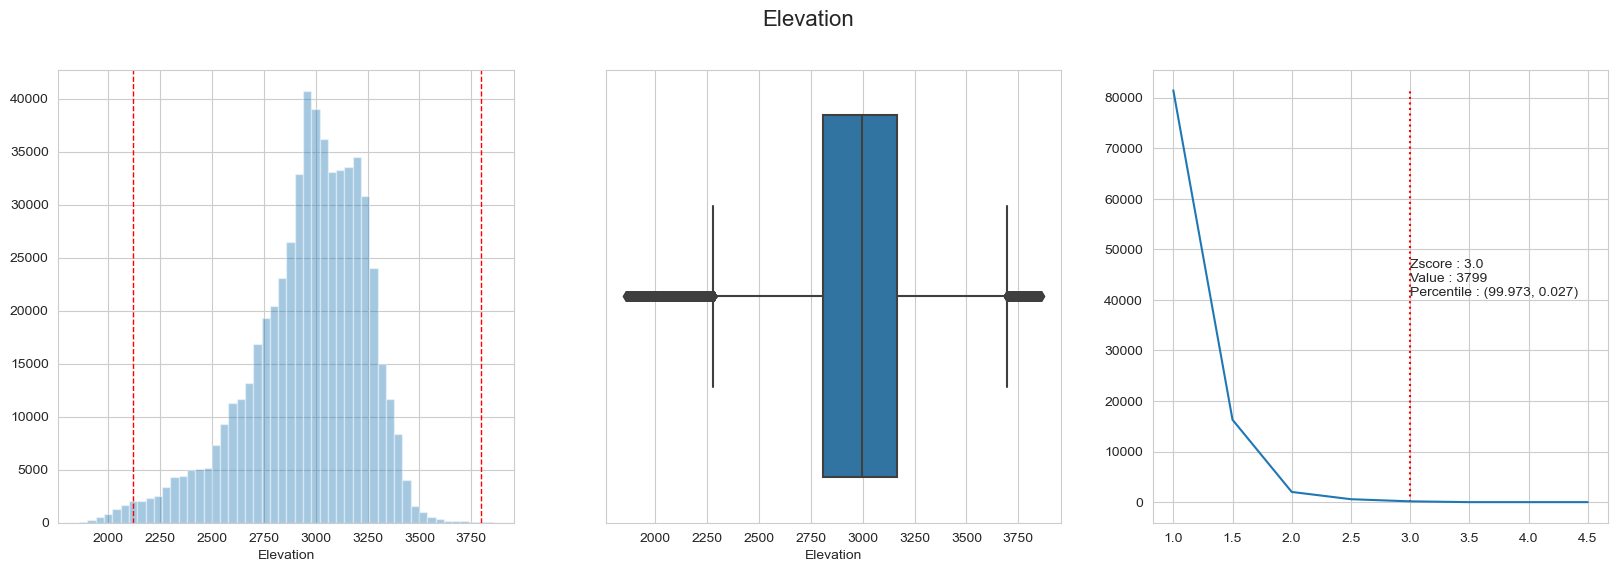

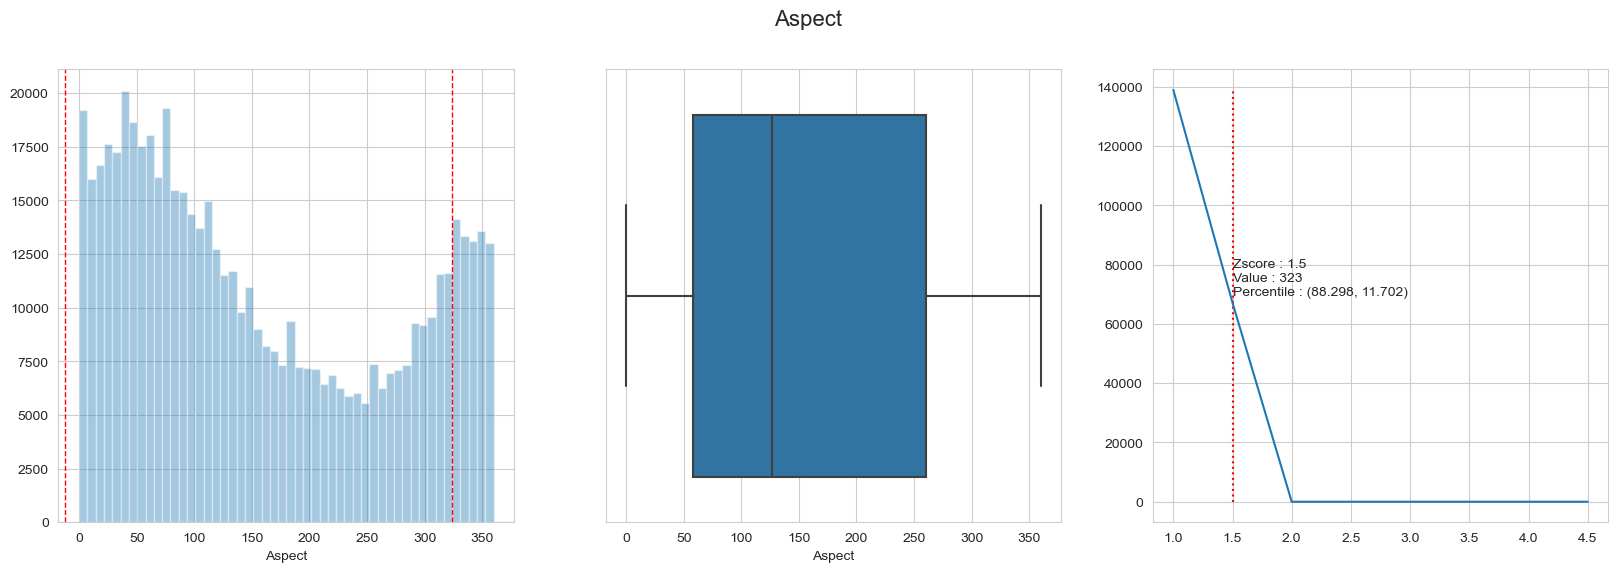

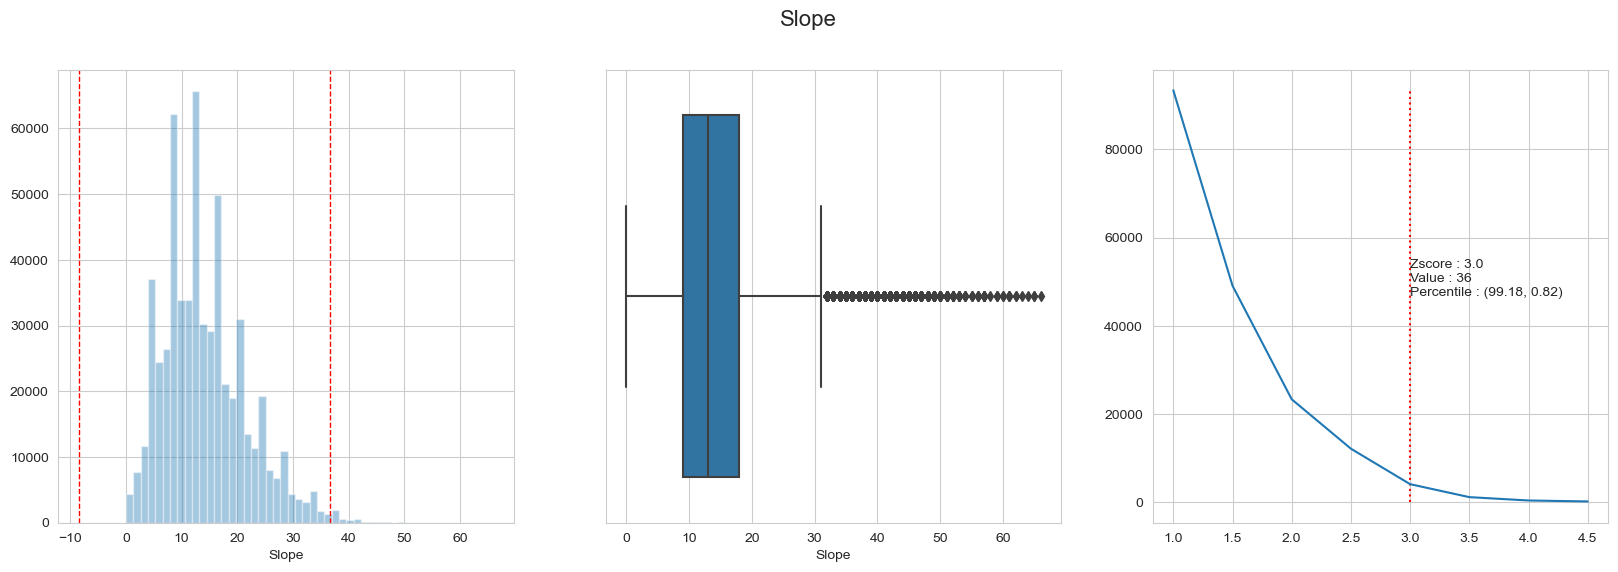

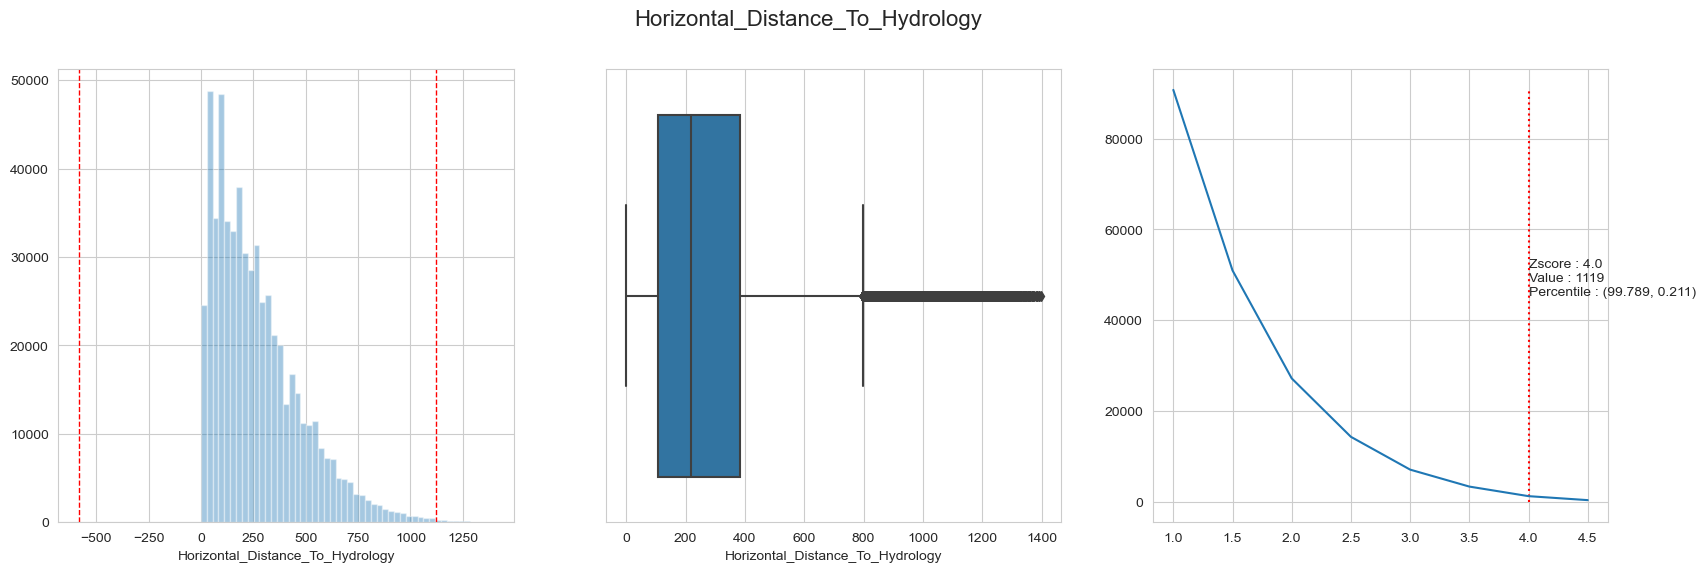

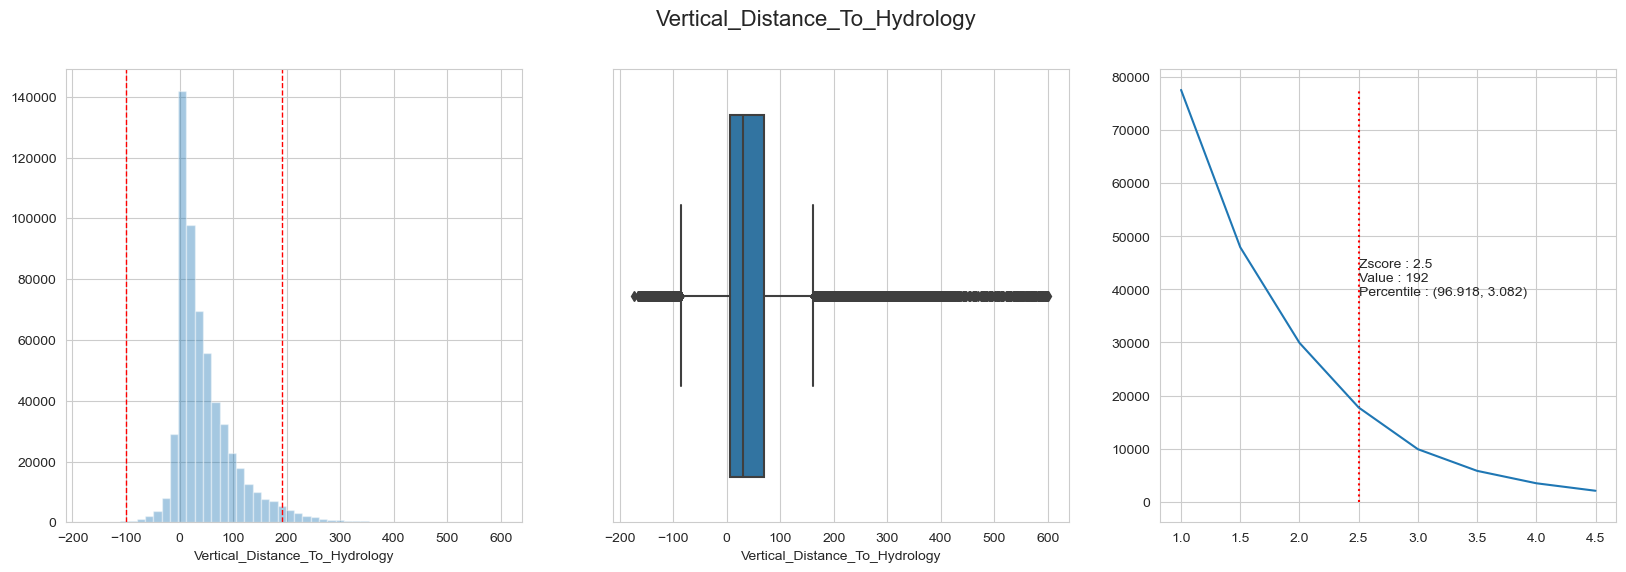

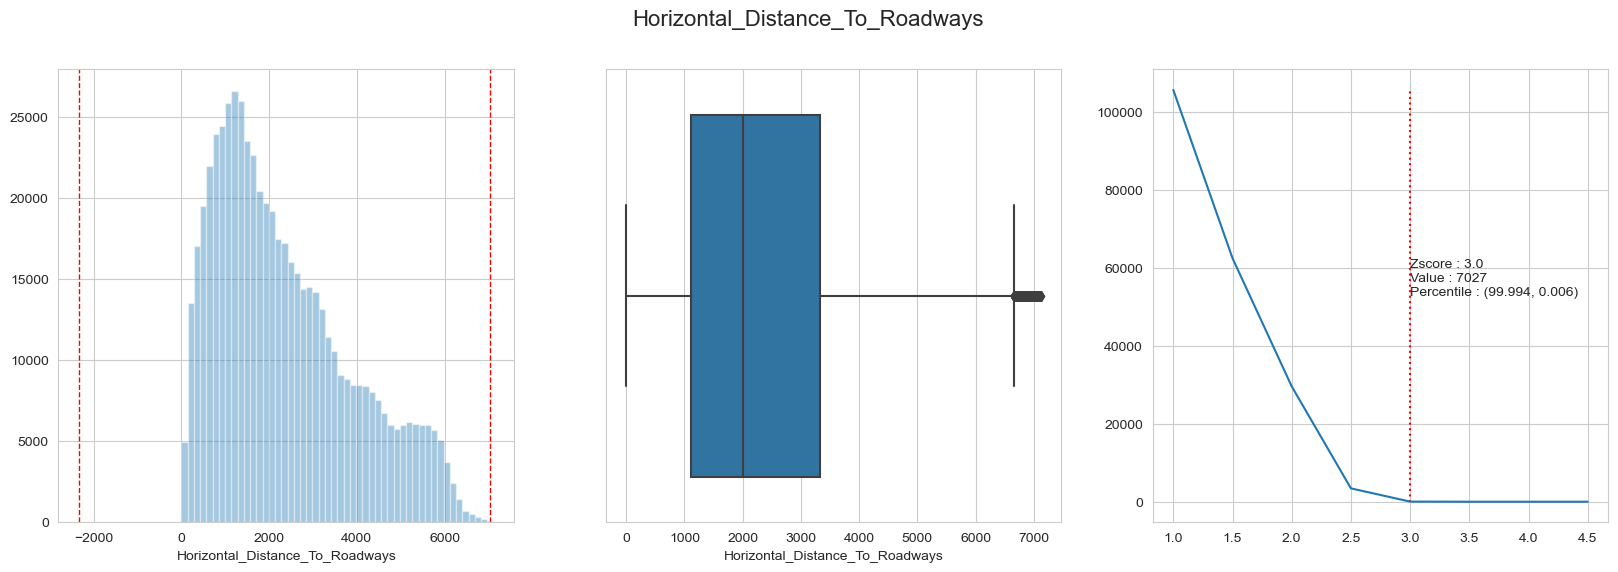

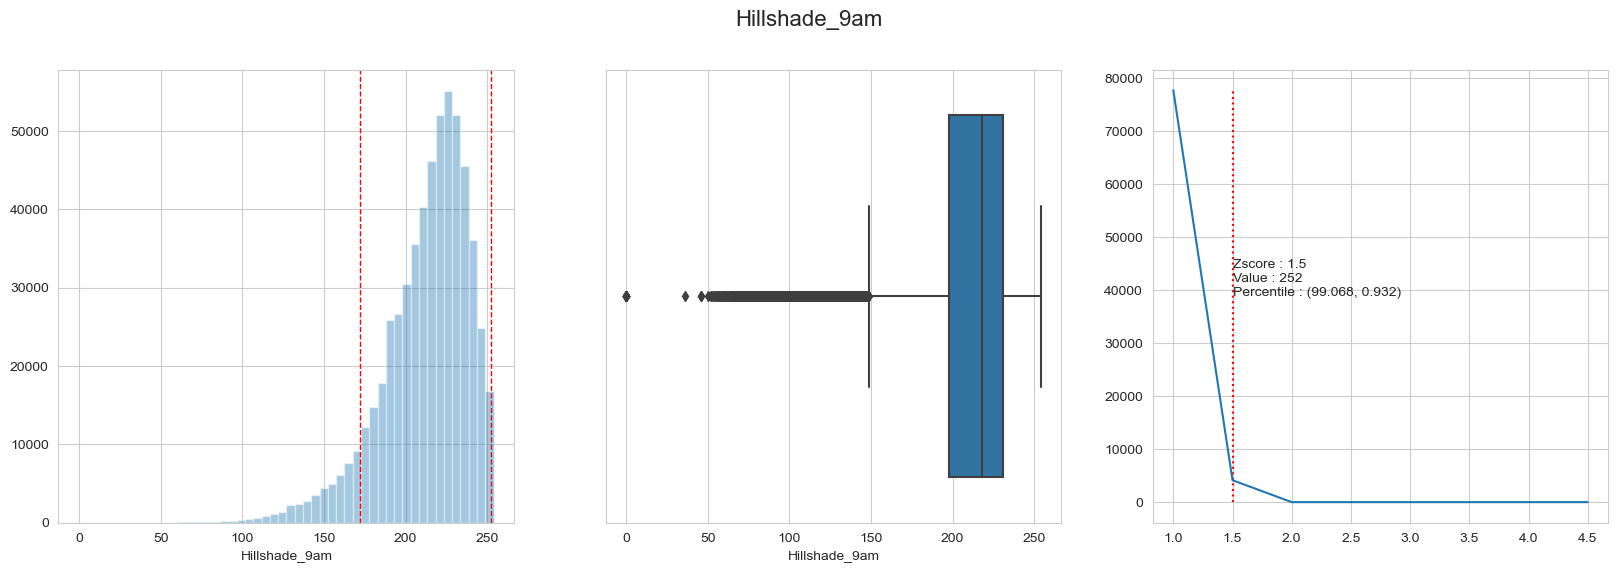

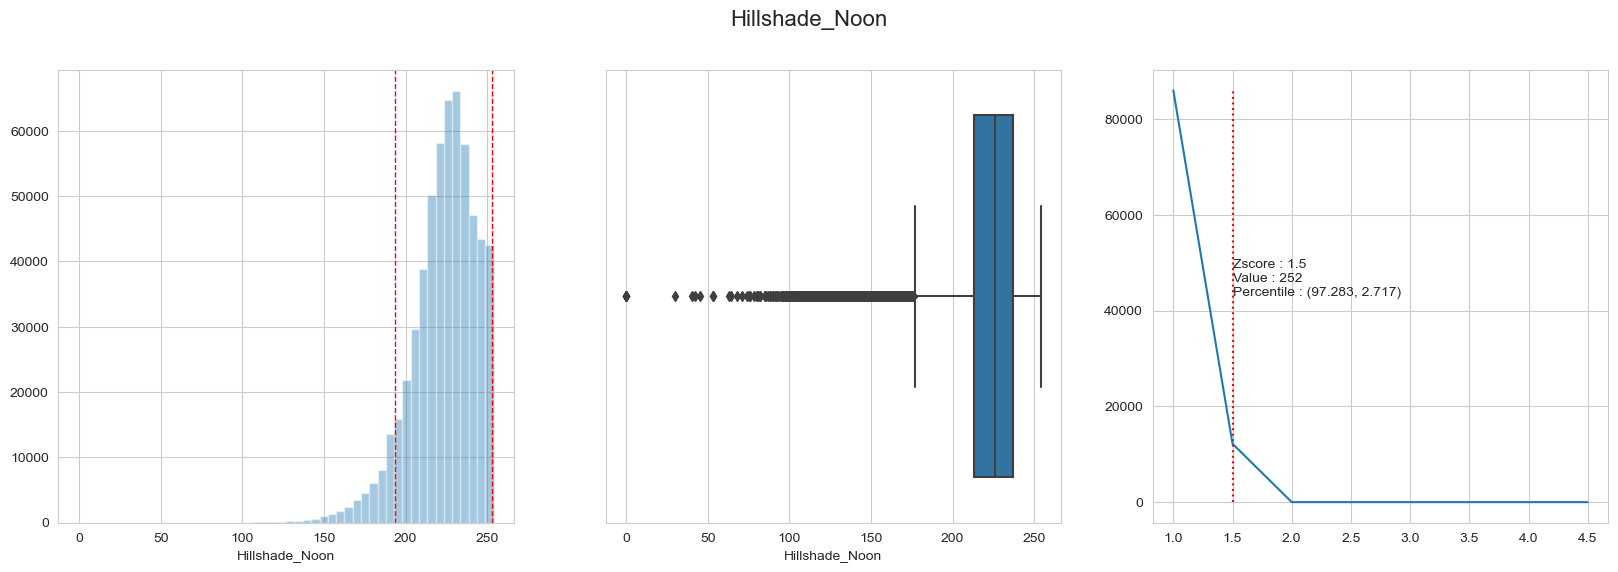

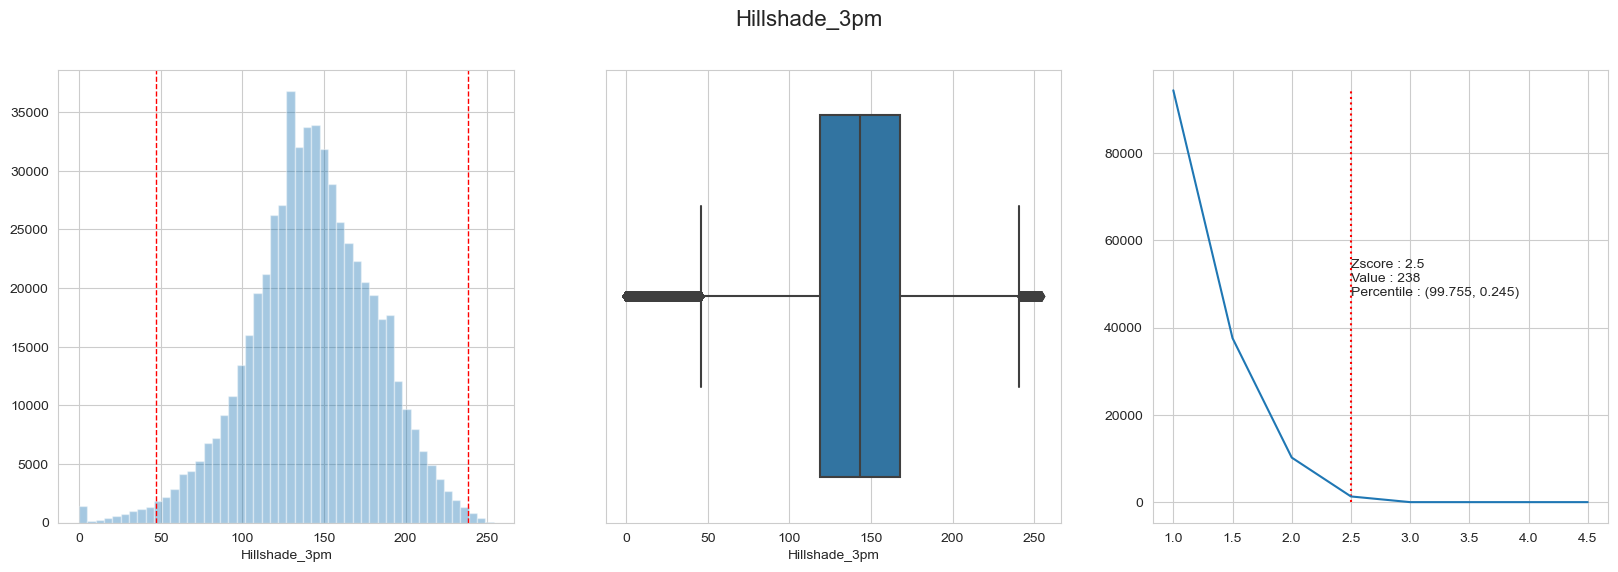

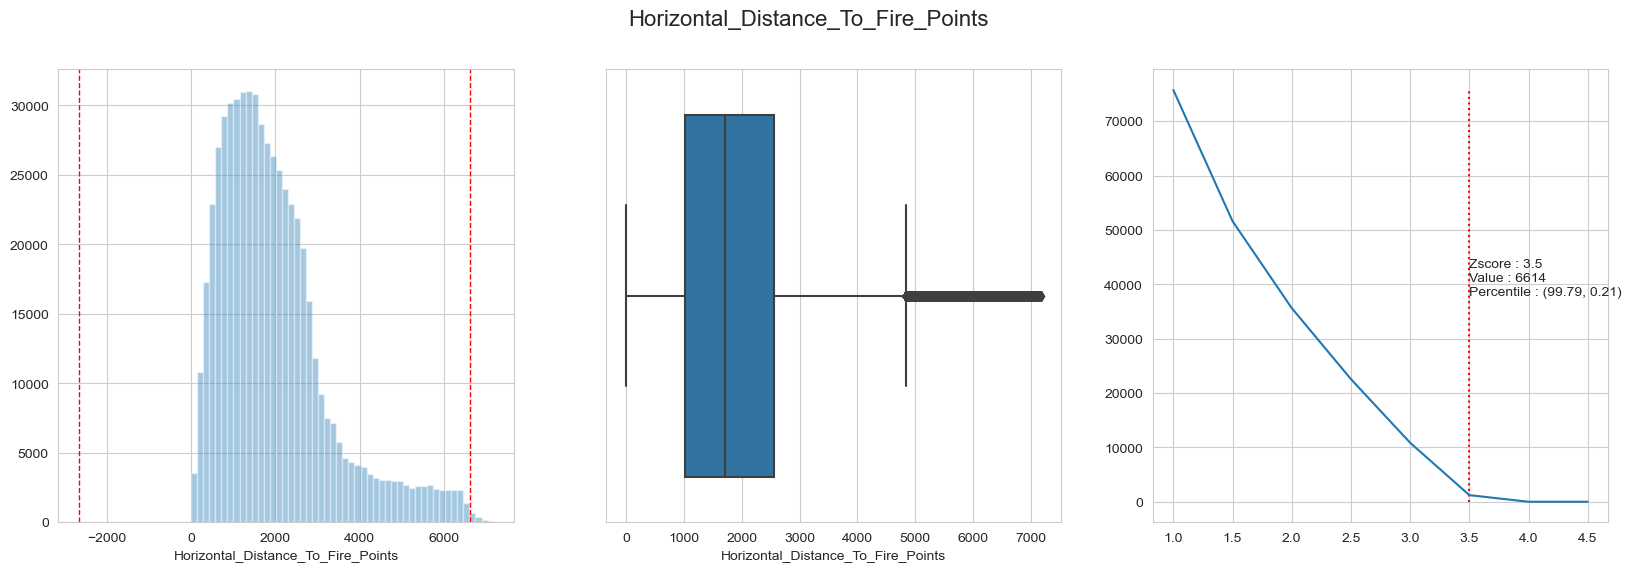

In [68]:
z_scores=[]
for i in df.columns[:-3]:
    z_scores.append(outlier_inspect(df,i)[2])

In [69]:
z_scores

[3.0, 1.5, 3.0, 4.0, 2.5, 3.0, 1.5, 1.5, 2.5, 3.5]

**Yukaridaki grefige gore Datanin  %99.7 sini kapsayan aralik**

In [70]:
df_z=df.copy()
for i in features:
    down_limit= df_z[i].mean() - z_scores[df_z.columns.get_loc(i)]*df_z[i].std()
    upper_limit= df_z[i].mean() + z_scores[df_z.columns.get_loc(i)]*df_z[i].std()
    condition= (down_limit < df_z[i]) & (df_z[i] < upper_limit)
    df_z=df_z[condition]

In [71]:
print('Number of Outliers:',len(df)-len(df_z))

Number of Outliers: 29788


In [72]:
df_3z=df.copy()
for i in features:
    down_limit= df_3z[i].mean() - (3*df_3z[i].std())
    upper_limit= df_3z[i].mean() + (3*df_3z[i].std())
    condition= (down_limit < df_3z[i]) & (df_3z[i] < upper_limit)
    df_3z=df_3z[condition]

In [73]:
print('Number of Outliers:',len(df)-len(df_3z))

Number of Outliers: 35880


#### *ii. Drop Outliers*

* We used different outlier detection methods. As a result, we decided to determine outliers with winsorize.

In [74]:
k=2
for i in features:
    lower,upper,_=detect_outliers(df_winsorised,i,k)
    df_winsorised=df_winsorised[(df_winsorised[i]>lower)&(df_winsorised[i]<upper)]

In [75]:
df=df_winsorised
df.shape

(575912, 13)

In [76]:
# After dropping rows, you can run reset_index()
df = df.reset_index(drop=True)

In [77]:
df.Cover_Type.value_counts(dropna=False).sort_index()

1    211761
2    283069
3     32522
4      2369
5      9490
6     16191
7     20510
Name: Cover_Type, dtype: int64

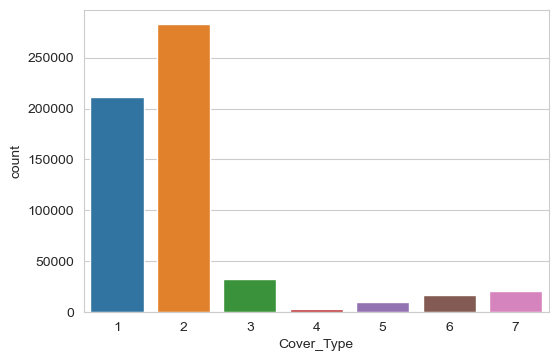

In [78]:
sns.countplot(x='Cover_Type',data=df);

In [79]:
def perc_col(df,col):
    print(f'Percentage of df["{col}"] Unique Values:\n')
    for i in sorted(df[col].unique()):
        print('%s: %%%.2f' % (i, 100*df[col].value_counts()[i]/len(df)))

In [80]:
perc_col(df,'Cover_Type')

Percentage of df["Cover_Type"] Unique Values:

1: %36.77
2: %49.15
3: %5.65
4: %0.41
5: %1.65
6: %2.81
7: %3.56


* Target Label is unbalanced. 

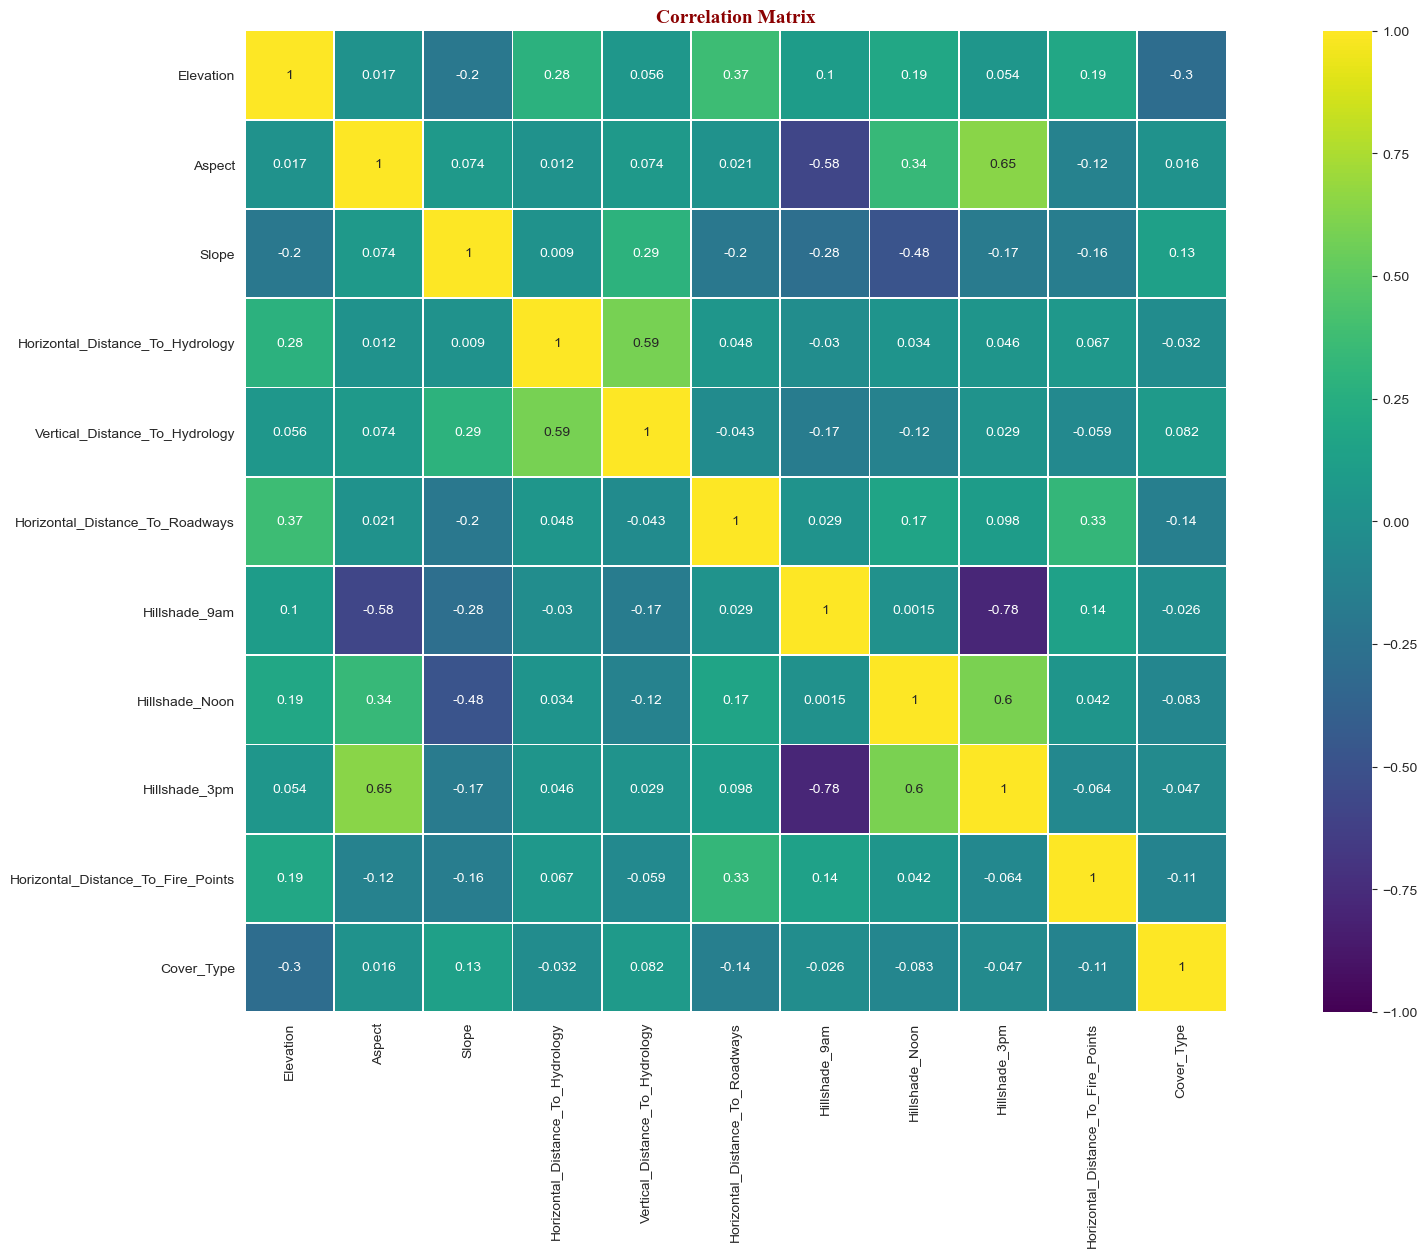

In [81]:
plt.figure(figsize=(25,13))
sns.heatmap(df.corr(),square=True, annot=True, linewidths=.5, vmin=-1, vmax=1, cmap='viridis')
plt.title("Correlation Matrix", fontdict=font_title)
plt.show()

In [82]:
df=pd.get_dummies(df)
df.head(2)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type40,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4
0,2596,51,3,258,0,510,221,232,148,3747,...,0,0,0,0,0,0,1,0,0,0
1,2590,56,2,212,-6,390,220,235,151,3747,...,0,0,0,0,0,0,1,0,0,0


In [85]:
df.to_csv("covtype_EDA.csv", index = False)

## Feature Engineering with *sqlite3* Library
Feature engineering is an optional process to increase the predictive success of the model. The effort you put in should be worth increasing success. So you can develop your own feature engineering approach.

Note that, after seeing the result of the models, there may be a possibility of making minor changes to the features in the modeling phase.

You are requested to do feature engineering operations with SQL. There are two ways to do this:
1. After moving the final version of your data set to ***SQLite Browser*** and performing feature engineering operations there, you can convert the resulting data set to dataframe format and use it again in python.
2. In Python, you can create a database and table with your data set by using the functions of the sqlite3 library, after performing feature engineering with SQL, you can convert the resulting data set to a dataframe.

In this case, we will illustrate the second method.

Follow the steps below to do feature engineering with the [sqlite3](https://docs.python.org/3/library/sqlite3.html) library:
 1. Import *sqlite3* library
 2. Create a sqlite database (``"tree_database"``) and transferring dataframe(``tree1``) from python into database table (``covtype2``)
  - You can use *connect(), to_sql() and read_sql_query()* functions.
 3. Assign SQL codes for feature engineering to an object. (produce or transform new columns, get rid of unnecassary columns, make the dataset ready to model)
 4. Transform final version of SQL table to dataframe.
 
Finally, you can save the final version of your data as csv for use in your models and work on a different notebook. On the other hand, you can continue to work on this notebook with the last dataframe.

### My Plan of Feature Extraction
- First, I decided to produce&transform a new column with ``Horizontal_Distance_To_Hydrology`` and ``Vertical_Distance_To_Hydrology`` columns. New column will contain the values of **Hypotenuse** of ``horizantal`` and ``vertical`` distances.

- As second, we can produce&transform an additional column which contains **average** of Horizantal Distances to Hydrology and Roadways.

- Third, I decided to transform a new column which contains **average** of `Elevation` and ``Vertical_Distance_To_Hydrology`` columns. So that, there is no need to have ``Horizontal_Distance_To_Hydrology`` and ``Vertical_Distance_To_Hydrology`` columns, because I have new columns which represent more value than them. I decide to drop these columns.

- Lastly, I will drop unnecessary columns ``'Hillshade_3pm', 'Soil_Type7', 'Soil_Type8', 'Soil_Type14', 'Soil_Type15', 'Soil_Type21', 'Soil_Type25', 'Soil_Type28', 'Soil_Type36', 'Soil_Type37'``) that I conclued previously.

- Note that, after seeing the result of the models, there may be a possibility of making minor changes to the features in the modeling phase.

In [1]:
import sqlite3

Creation a sqlite database ("tree_database") and transferring dataframe(tree1) from python into database table (covtype2)

In [2]:
# Creation of the connection and importing dataframe into database.

# with sqlite3.connect("tree_database.db") as cnnct:
#     tree1.to_sql("covtype2", cnnct, if_exists = "replace")

In [87]:
# create a database named as tree_database.db
cnnct = sqlite3.connect('tree_database.db')  

with cnnct: 
    # create a table named as covtype in tree_database database
    df.to_sql("covtype", cnnct, if_exists = "replace")

In [88]:
query1 = """SELECT *,
(Horizontal_Distance_To_Hydrology*Horizontal_Distance_To_Hydrology)+(Vertical_Distance_To_Hydrology*Vertical_Distance_To_Hydrology) as Square_Hypo_Distance,
(Horizontal_Distance_To_Hydrology + Horizontal_Distance_To_Roadways)/2 as Average_Dist_Road_Hydro, 
(Elevation + Vertical_Distance_To_Hydrology) /2 as Average_Elevation_Hydro
FROM covtype;"""

In [89]:
query2 = """SELECT Elevation, Aspect, Slope, Horizontal_Distance_To_Roadways, Hillshade_9am, Hillshade_Noon, 
Horizontal_Distance_To_Fire_Points, Wilderness_Area1, Wilderness_Area2, Wilderness_Area3,
Wilderness_Area4, Soil_Type1, Soil_Type2, Soil_Type3, Soil_Type4, Soil_Type5, Soil_Type6,
Soil_Type9, Soil_Type10, Soil_Type11, Soil_Type12, Soil_Type13, Soil_Type16, Soil_Type17, 
Soil_Type18, Soil_Type19, Soil_Type20, Soil_Type22, Soil_Type23, Soil_Type24, 
Soil_Type26, Soil_Type27, Soil_Type29, Soil_Type30, Soil_Type31, Soil_Type32, Soil_Type33, 
Soil_Type34, Soil_Type35, Soil_Type38, Soil_Type39, Soil_Type40, Cover_Type,
Square_Hypo_Distance, Average_Dist_Road_Hydro, Average_Elevation_Hydro
FROM covtype;"""

In [91]:
# connect tree_database.db
cnnct = sqlite3.connect('tree_database.db')  

with cnnct: 
    # create a table named as covtype in tree_database database
    df1 = pd.read_sql_query(query1, cnnct)  # transforming and exporting to df1
    df1.to_sql("covtype", cnnct, if_exists = "replace")  # importing again to dropping columns
    df2 = pd.read_sql_query(query2, cnnct)  # exporting table to df2

In [92]:
df2.to_csv("covtype_FE.csv", index = False)

***
***